In [1]:
!rm -r /content/logs/*

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [3]:
%tensorboard --logdir logs/scalars

In [4]:
import tensorflow as tf

# download and load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# transform images to vectors (flatenning) and change type
x_train = x_train.reshape(60000, 784)
x_validation = x_validation.reshape(10000, 784)
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

# normalize vectors values from [0,255] -> [0,1]
x_train /= 255
x_validation /= 255

print('train samples', x_train.shape)
print('test samples', x_validation.shape)

print('train label samples', y_train.shape)
print('test label samples', y_validation.shape)

train samples (60000, 784)
test samples (10000, 784)
train label samples (60000,)
test label samples (10000,)


In [5]:
from tensorflow.keras.utils import to_categorical

# convert labels from category to one-hot
y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)

In [6]:
N_EPOCH = 100

# define each model training configuration
experiments = [

    # base
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 16, 'dropout': 0.5, 'BN': True},

    # no dropout
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 16, 'dropout': 0.0, 'BN': True},

    # deeper network
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32, 16], 'activation': 'relu',
     'batch_size': 16, 'dropout': 0.5, 'BN': True},

    # batch size of 32
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 32, 'dropout': 0.5, 'BN': True},

    # batch size of 64
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 64, 'dropout': 0.5, 'BN': True},

    # activation function sigmoid
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'sigmoid',
     'batch_size': 16, 'dropout': 0.5, 'BN': True},

    # no batch normalization
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 16, 'dropout': 0.5, 'BN': False},

    # smaller learning rate
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.SGD, 'lr': 0.01, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 16, 'dropout': 0.5, 'BN': True},

    # optimizer Adam
    {'epoch': N_EPOCH, 'optimizer': tf.keras.optimizers.Adam, 'lr': 0.1, 'layers': [128, 64, 32], 'activation': 'relu',
     'batch_size': 16, 'dropout': 0.5, 'BN': True},
]

In [7]:
MODELS = {}
for i, config in enumerate(experiments):

    # specify tensorboard directory
    logdir = "logs/scalars/" + str(i)

    # create tensorboard callback
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

    # create saving model callback
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='model_{}.ckpt'.format(str(i)), monitor='val_loss', verbose=1, save_best_only=True)

    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(config['layers'][0], activation=config['activation'], input_dim=784))
    for hiddden_dim in config['layers'][1:]:
        if config['BN']:
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(config['dropout']))
        model.add(tf.keras.layers.Dense(hiddden_dim, activation=config['activation']))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # define optimizer
    optim = config['optimizer'](lr=config['lr'])

    # compile model with optimizer, loss and metrics
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    # train model
    history = model.fit(x_train, y_train, validation_split=0.2, batch_size=config['batch_size'], epochs=config['epoch'], verbose=1, callbacks=[tensorboard_callback, checkpointer])

    # add model to dictionary of models
    MODELS.update({'experiment_{}'.format(str(i)): (history, model)})

Epoch 1/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.8894 - accuracy: 0.7160
Epoch 1: val_loss improved from inf to 0.27017, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.8891 - accuracy: 0.7162 - val_loss: 0.2702 - val_accuracy: 0.9198
Epoch 2/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.5598 - accuracy: 0.8304
Epoch 2: val_loss improved from 0.27017 to 0.21734, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.5588 - accuracy: 0.8307 - val_loss: 0.2173 - val_accuracy: 0.9353
Epoch 3/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.4732 - accuracy: 0.8578
Epoch 3: val_loss improved from 0.21734 to 0.19185, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4725 - accuracy: 0.8580 - val_loss: 0.1919 - val_accuracy: 0.9420
Epoch 4/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.4286 - accuracy: 0.8728
Epoch 4: val_loss improved from 0.19185 to 0.17909, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4284 - accuracy: 0.8729 - val_loss: 0.1791 - val_accuracy: 0.9453
Epoch 5/100
2972/3000 [============================>.] - ETA: 0s - loss: 0.4050 - accuracy: 0.8814
Epoch 5: val_loss improved from 0.17909 to 0.16375, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.4053 - accuracy: 0.8813 - val_loss: 0.1638 - val_accuracy: 0.9503
Epoch 6/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3787 - accuracy: 0.8876
Epoch 6: val_loss improved from 0.16375 to 0.15338, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3784 - accuracy: 0.8878 - val_loss: 0.1534 - val_accuracy: 0.9545
Epoch 7/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8943
Epoch 7: val_loss improved from 0.15338 to 0.14685, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3575 - accuracy: 0.8944 - val_loss: 0.1469 - val_accuracy: 0.9563
Epoch 8/100
2974/3000 [============================>.] - ETA: 0s - loss: 0.3470 - accuracy: 0.8990
Epoch 8: val_loss improved from 0.14685 to 0.13948, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3465 - accuracy: 0.8992 - val_loss: 0.1395 - val_accuracy: 0.9582
Epoch 9/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.3371 - accuracy: 0.9014
Epoch 9: val_loss improved from 0.13948 to 0.13379, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3373 - accuracy: 0.9013 - val_loss: 0.1338 - val_accuracy: 0.9603
Epoch 10/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.9022
Epoch 10: val_loss improved from 0.13379 to 0.13371, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3274 - accuracy: 0.9021 - val_loss: 0.1337 - val_accuracy: 0.9604
Epoch 11/100
2974/3000 [============================>.] - ETA: 0s - loss: 0.3166 - accuracy: 0.9066
Epoch 11: val_loss improved from 0.13371 to 0.12762, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3164 - accuracy: 0.9067 - val_loss: 0.1276 - val_accuracy: 0.9628
Epoch 12/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3058 - accuracy: 0.9107
Epoch 12: val_loss improved from 0.12762 to 0.12616, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3059 - accuracy: 0.9106 - val_loss: 0.1262 - val_accuracy: 0.9622
Epoch 13/100
2974/3000 [============================>.] - ETA: 0s - loss: 0.3007 - accuracy: 0.9118
Epoch 13: val_loss improved from 0.12616 to 0.12279, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3007 - accuracy: 0.9118 - val_loss: 0.1228 - val_accuracy: 0.9625
Epoch 14/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2926 - accuracy: 0.9137
Epoch 14: val_loss improved from 0.12279 to 0.11653, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2925 - accuracy: 0.9136 - val_loss: 0.1165 - val_accuracy: 0.9655
Epoch 15/100
2974/3000 [============================>.] - ETA: 0s - loss: 0.2884 - accuracy: 0.9159
Epoch 15: val_loss did not improve from 0.11653
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2882 - accuracy: 0.9160 - val_loss: 0.1170 - val_accuracy: 0.9649
Epoch 16/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.9175
Epoch 16: val_loss improved from 0.11653 to 0.11263, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2821 - accuracy: 0.9174 - val_loss: 0.1126 - val_accuracy: 0.9655
Epoch 17/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9207
Epoch 17: val_loss did not improve from 0.11263
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2703 - accuracy: 0.9207 - val_loss: 0.1142 - val_accuracy: 0.9669
Epoch 18/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.9188
Epoch 18: val_loss improved from 0.11263 to 0.10996, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2773 - accuracy: 0.9190 - val_loss: 0.1100 - val_accuracy: 0.9674
Epoch 19/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.2628 - accuracy: 0.9236
Epoch 19: val_loss improved from 0.10996 to 0.10865, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2635 - accuracy: 0.9235 - val_loss: 0.1087 - val_accuracy: 0.9672
Epoch 20/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.9225
Epoch 20: val_loss improved from 0.10865 to 0.10653, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2622 - accuracy: 0.9225 - val_loss: 0.1065 - val_accuracy: 0.9679
Epoch 21/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.9232
Epoch 21: val_loss did not improve from 0.10653
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2601 - accuracy: 0.9231 - val_loss: 0.1095 - val_accuracy: 0.9673
Epoch 22/100
2976/3000 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9212
Epoch 22: val_loss did not improve from 0.10653
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2644 - accuracy: 0.9213 - val_loss: 0.1097 - val_accuracy: 0.9674
Epoch 23/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.9236
Epoch 23: val_loss did not improve from 0.10653
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2574 - accuracy: 0.9237 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 24/100
2979/3000 [

INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2474 - accuracy: 0.9275 - val_loss: 0.1049 - val_accuracy: 0.9699
Epoch 25/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.2434 - accuracy: 0.9297
Epoch 25: val_loss did not improve from 0.10490
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2432 - accuracy: 0.9297 - val_loss: 0.1060 - val_accuracy: 0.9679
Epoch 26/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.9278
Epoch 26: val_loss improved from 0.10490 to 0.10160, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2444 - accuracy: 0.9278 - val_loss: 0.1016 - val_accuracy: 0.9700
Epoch 27/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.9284
Epoch 27: val_loss improved from 0.10160 to 0.10122, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2425 - accuracy: 0.9283 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 28/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2413 - accuracy: 0.9301
Epoch 28: val_loss did not improve from 0.10122
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2412 - accuracy: 0.9301 - val_loss: 0.1024 - val_accuracy: 0.9701
Epoch 29/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9287
Epoch 29: val_loss did not improve from 0.10122
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2378 - accuracy: 0.9288 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 30/100
2975/3000 [============================>.] - ETA: 0s - loss: 0.2364 - accuracy: 0.9308
Epoch 30: val_loss did not improve from 0.10122
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2363 - accuracy: 0.9310 - val_loss: 0.1019 - val_accuracy: 0.9701
Epoch 31/100
2986/3000 [

INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2320 - accuracy: 0.9323 - val_loss: 0.1010 - val_accuracy: 0.9699
Epoch 32/100
2976/3000 [============================>.] - ETA: 0s - loss: 0.2321 - accuracy: 0.9313
Epoch 32: val_loss did not improve from 0.10102
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2318 - accuracy: 0.9313 - val_loss: 0.1035 - val_accuracy: 0.9700
Epoch 33/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9330
Epoch 33: val_loss improved from 0.10102 to 0.10075, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2261 - accuracy: 0.9331 - val_loss: 0.1008 - val_accuracy: 0.9711
Epoch 34/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9339
Epoch 34: val_loss improved from 0.10075 to 0.09796, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2274 - accuracy: 0.9339 - val_loss: 0.0980 - val_accuracy: 0.9716
Epoch 35/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9334
Epoch 35: val_loss did not improve from 0.09796
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2279 - accuracy: 0.9334 - val_loss: 0.0981 - val_accuracy: 0.9716
Epoch 36/100
2977/3000 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9357
Epoch 36: val_loss improved from 0.09796 to 0.09516, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2204 - accuracy: 0.9358 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 37/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.2269 - accuracy: 0.9337
Epoch 37: val_loss improved from 0.09516 to 0.09473, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2265 - accuracy: 0.9338 - val_loss: 0.0947 - val_accuracy: 0.9721
Epoch 38/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.2164 - accuracy: 0.9366
Epoch 38: val_loss did not improve from 0.09473
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2161 - accuracy: 0.9367 - val_loss: 0.0950 - val_accuracy: 0.9719
Epoch 39/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9364
Epoch 39: val_loss did not improve from 0.09473
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2175 - accuracy: 0.9365 - val_loss: 0.0948 - val_accuracy: 0.9722
Epoch 40/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.2229 - accuracy: 0.9354
Epoch 40: val_loss improved from 0.09473 to 0.09349, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2231 - accuracy: 0.9353 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 41/100
2976/3000 [============================>.] - ETA: 0s - loss: 0.2175 - accuracy: 0.9355
Epoch 41: val_loss did not improve from 0.09349
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2172 - accuracy: 0.9355 - val_loss: 0.0981 - val_accuracy: 0.9728
Epoch 42/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9370
Epoch 42: val_loss did not improve from 0.09349
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2160 - accuracy: 0.9369 - val_loss: 0.0937 - val_accuracy: 0.9732
Epoch 43/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9359
Epoch 43: val_loss did not improve from 0.09349
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2164 - accuracy: 0.9359 - val_loss: 0.0937 - val_accuracy: 0.9725
Epoch 44/100
2993/3000 [

INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2159 - accuracy: 0.9371 - val_loss: 0.0930 - val_accuracy: 0.9741
Epoch 45/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2117 - accuracy: 0.9376
Epoch 45: val_loss improved from 0.09297 to 0.09237, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2121 - accuracy: 0.9375 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 46/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9379
Epoch 46: val_loss did not improve from 0.09237
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2123 - accuracy: 0.9379 - val_loss: 0.0950 - val_accuracy: 0.9725
Epoch 47/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.2053 - accuracy: 0.9393
Epoch 47: val_loss improved from 0.09237 to 0.08942, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2052 - accuracy: 0.9393 - val_loss: 0.0894 - val_accuracy: 0.9743
Epoch 48/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9383
Epoch 48: val_loss did not improve from 0.08942
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2036 - accuracy: 0.9384 - val_loss: 0.0903 - val_accuracy: 0.9735
Epoch 49/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.9388
Epoch 49: val_loss did not improve from 0.08942
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2058 - accuracy: 0.9388 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 50/100
2973/3000 [============================>.] - ETA: 0s - loss: 0.2093 - accuracy: 0.9382
Epoch 50: val_loss did not improve from 0.08942
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2095 - accuracy: 0.9382 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 51/100
3000/3000 [

INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1970 - accuracy: 0.9426 - val_loss: 0.0881 - val_accuracy: 0.9747
Epoch 61/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9409
Epoch 61: val_loss did not improve from 0.08806
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2001 - accuracy: 0.9410 - val_loss: 0.0905 - val_accuracy: 0.9736
Epoch 62/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.1920 - accuracy: 0.9429
Epoch 62: val_loss did not improve from 0.08806
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1924 - accuracy: 0.9428 - val_loss: 0.0898 - val_accuracy: 0.9744
Epoch 63/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9428
Epoch 63: val_loss did not improve from 0.08806
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1948 - accuracy: 0.9428 - val_loss: 0.0883 - val_accuracy: 0.9748
Epoch 64/100
2992/3000 [

INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1839 - accuracy: 0.9462 - val_loss: 0.0866 - val_accuracy: 0.9762
Epoch 75/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1886 - accuracy: 0.9451
Epoch 75: val_loss improved from 0.08664 to 0.08651, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1887 - accuracy: 0.9450 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 76/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1861 - accuracy: 0.9455
Epoch 76: val_loss improved from 0.08651 to 0.08498, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1861 - accuracy: 0.9455 - val_loss: 0.0850 - val_accuracy: 0.9762
Epoch 77/100
2975/3000 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.9454
Epoch 77: val_loss did not improve from 0.08498
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1833 - accuracy: 0.9453 - val_loss: 0.0893 - val_accuracy: 0.9747
Epoch 78/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.1874 - accuracy: 0.9441
Epoch 78: val_loss did not improve from 0.08498
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1880 - accuracy: 0.9439 - val_loss: 0.0885 - val_accuracy: 0.9750
Epoch 79/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.9452
Epoch 79: val_loss did not improve from 0.08498
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1824 - accuracy: 0.9451 - val_loss: 0.0885 - val_accuracy: 0.9748
Epoch 80/100
2981/3000 [

INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1756 - accuracy: 0.9470 - val_loss: 0.0846 - val_accuracy: 0.9768
Epoch 94/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.1754 - accuracy: 0.9490
Epoch 94: val_loss did not improve from 0.08461
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1750 - accuracy: 0.9491 - val_loss: 0.0861 - val_accuracy: 0.9758
Epoch 95/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.1767 - accuracy: 0.9481
Epoch 95: val_loss improved from 0.08461 to 0.08385, saving model to model_0.ckpt
INFO:tensorflow:Assets written to: model_0.ckpt\assets


INFO:tensorflow:Assets written to: model_0.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1767 - accuracy: 0.9481 - val_loss: 0.0838 - val_accuracy: 0.9765
Epoch 96/100
2976/3000 [============================>.] - ETA: 0s - loss: 0.1747 - accuracy: 0.9480
Epoch 96: val_loss did not improve from 0.08385
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1749 - accuracy: 0.9479 - val_loss: 0.0867 - val_accuracy: 0.9752
Epoch 97/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.1769 - accuracy: 0.9466
Epoch 97: val_loss did not improve from 0.08385
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1770 - accuracy: 0.9466 - val_loss: 0.0859 - val_accuracy: 0.9753
Epoch 98/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1780 - accuracy: 0.9476
Epoch 98: val_loss did not improve from 0.08385
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1777 - accuracy: 0.9476 - val_loss: 0.0847 - val_accuracy: 0.9759
Epoch 99/100
2992/3000 [

Epoch 1/100
2975/3000 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8698
Epoch 1: val_loss improved from inf to 0.17571, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 8s 2ms/step - loss: 0.4377 - accuracy: 0.8702 - val_loss: 0.1757 - val_accuracy: 0.9489
Epoch 2/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9324
Epoch 2: val_loss improved from 0.17571 to 0.14678, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.2221 - accuracy: 0.9323 - val_loss: 0.1468 - val_accuracy: 0.9558
Epoch 3/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.1765 - accuracy: 0.9474
Epoch 3: val_loss improved from 0.14678 to 0.12924, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1761 - accuracy: 0.9475 - val_loss: 0.1292 - val_accuracy: 0.9628
Epoch 4/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9555
Epoch 4: val_loss improved from 0.12924 to 0.11779, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1462 - accuracy: 0.9555 - val_loss: 0.1178 - val_accuracy: 0.9669
Epoch 5/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9610
Epoch 5: val_loss improved from 0.11779 to 0.11092, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1273 - accuracy: 0.9610 - val_loss: 0.1109 - val_accuracy: 0.9674
Epoch 6/100
2977/3000 [============================>.] - ETA: 0s - loss: 0.1161 - accuracy: 0.9640
Epoch 6: val_loss improved from 0.11092 to 0.10116, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1162 - accuracy: 0.9640 - val_loss: 0.1012 - val_accuracy: 0.9696
Epoch 7/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.1062 - accuracy: 0.9666
Epoch 7: val_loss improved from 0.10116 to 0.09456, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1063 - accuracy: 0.9665 - val_loss: 0.0946 - val_accuracy: 0.9718
Epoch 8/100
3000/3000 [==============================] - ETA: 0s - loss: 0.0932 - accuracy: 0.9715
Epoch 8: val_loss improved from 0.09456 to 0.09394, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.0939 - val_accuracy: 0.9732
Epoch 9/100
2975/3000 [============================>.] - ETA: 0s - loss: 0.0868 - accuracy: 0.9724
Epoch 9: val_loss improved from 0.09394 to 0.09377, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0869 - accuracy: 0.9723 - val_loss: 0.0938 - val_accuracy: 0.9727
Epoch 10/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9737
Epoch 10: val_loss improved from 0.09377 to 0.09126, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0818 - accuracy: 0.9736 - val_loss: 0.0913 - val_accuracy: 0.9735
Epoch 11/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9751
Epoch 11: val_loss improved from 0.09126 to 0.08904, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0783 - accuracy: 0.9751 - val_loss: 0.0890 - val_accuracy: 0.9755
Epoch 12/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9766
Epoch 12: val_loss did not improve from 0.08904
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0741 - accuracy: 0.9766 - val_loss: 0.0906 - val_accuracy: 0.9730
Epoch 13/100
3000/3000 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9788
Epoch 13: val_loss did not improve from 0.08904
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0650 - accuracy: 0.9788 - val_loss: 0.0897 - val_accuracy: 0.9747
Epoch 14/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9783
Epoch 14: val_loss improved from 0.08904 to 0.08803, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0662 - accuracy: 0.9783 - val_loss: 0.0880 - val_accuracy: 0.9752
Epoch 15/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9795
Epoch 15: val_loss improved from 0.08803 to 0.08511, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0627 - accuracy: 0.9795 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 16/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.0562 - accuracy: 0.9821
Epoch 16: val_loss did not improve from 0.08511
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.0904 - val_accuracy: 0.9756
Epoch 17/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9821
Epoch 17: val_loss improved from 0.08511 to 0.08393, saving model to model_1.ckpt
INFO:tensorflow:Assets written to: model_1.ckpt\assets


INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0539 - accuracy: 0.9820 - val_loss: 0.0839 - val_accuracy: 0.9775
Epoch 18/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.0585 - accuracy: 0.9811
Epoch 18: val_loss did not improve from 0.08393
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.0863 - val_accuracy: 0.9757
Epoch 19/100
3000/3000 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9836
Epoch 19: val_loss did not improve from 0.08393
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.0913 - val_accuracy: 0.9758
Epoch 20/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.0513 - accuracy: 0.9831
Epoch 20: val_loss did not improve from 0.08393
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0515 - accuracy: 0.9831 - val_loss: 0.0845 - val_accuracy: 0.9775
Epoch 21/100
2995/3000 [

INFO:tensorflow:Assets written to: model_1.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.0440 - accuracy: 0.9850 - val_loss: 0.0814 - val_accuracy: 0.9772
Epoch 24/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9862
Epoch 24: val_loss did not improve from 0.08139
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0414 - accuracy: 0.9861 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 25/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.9852
Epoch 25: val_loss did not improve from 0.08139
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0442 - accuracy: 0.9852 - val_loss: 0.0920 - val_accuracy: 0.9765
Epoch 26/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9858
Epoch 26: val_loss did not improve from 0.08139
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0417 - accuracy: 0.9858 - val_loss: 0.0829 - val_accuracy: 0.9777
Epoch 27/100
2992/3000 [

Epoch 53/100
2974/3000 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9921
Epoch 53: val_loss did not improve from 0.08139
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0972 - val_accuracy: 0.9776
Epoch 54/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9915
Epoch 54: val_loss did not improve from 0.08139
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0246 - accuracy: 0.9915 - val_loss: 0.0979 - val_accuracy: 0.9776
Epoch 55/100
3000/3000 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9926
Epoch 55: val_loss did not improve from 0.08139
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0211 - accuracy: 0.9926 - val_loss: 0.0933 - val_accuracy: 0.9765
Epoch 56/100
2974/3000 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9926
Epoch 56: val_loss did not improve from 0.08139
3000/3000

Epoch 1/100
2984/3000 [============================>.] - ETA: 0s - loss: 1.3883 - accuracy: 0.5267
Epoch 1: val_loss improved from inf to 0.49258, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 1.3865 - accuracy: 0.5274 - val_loss: 0.4926 - val_accuracy: 0.8759
Epoch 2/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.9065 - accuracy: 0.7101
Epoch 2: val_loss improved from 0.49258 to 0.36312, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.9061 - accuracy: 0.7101 - val_loss: 0.3631 - val_accuracy: 0.9009
Epoch 3/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.7725 - accuracy: 0.7580
Epoch 3: val_loss improved from 0.36312 to 0.28953, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.7725 - accuracy: 0.7579 - val_loss: 0.2895 - val_accuracy: 0.9208
Epoch 4/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.6985 - accuracy: 0.7905
Epoch 4: val_loss improved from 0.28953 to 0.25145, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.6983 - accuracy: 0.7907 - val_loss: 0.2515 - val_accuracy: 0.9300
Epoch 5/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.6423 - accuracy: 0.8110
Epoch 5: val_loss improved from 0.25145 to 0.23854, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.6424 - accuracy: 0.8110 - val_loss: 0.2385 - val_accuracy: 0.9337
Epoch 6/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.6004 - accuracy: 0.8249
Epoch 6: val_loss improved from 0.23854 to 0.21478, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.6003 - accuracy: 0.8248 - val_loss: 0.2148 - val_accuracy: 0.9385
Epoch 7/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.5746 - accuracy: 0.8348
Epoch 7: val_loss improved from 0.21478 to 0.19994, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.5743 - accuracy: 0.8350 - val_loss: 0.1999 - val_accuracy: 0.9422
Epoch 8/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.5448 - accuracy: 0.8467
Epoch 8: val_loss improved from 0.19994 to 0.19045, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.5449 - accuracy: 0.8468 - val_loss: 0.1905 - val_accuracy: 0.9466
Epoch 9/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.5266 - accuracy: 0.8521
Epoch 9: val_loss did not improve from 0.19045
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5266 - accuracy: 0.8521 - val_loss: 0.1906 - val_accuracy: 0.9467
Epoch 10/100
3000/3000 [==============================] - ETA: 0s - loss: 0.5056 - accuracy: 0.8590
Epoch 10: val_loss improved from 0.19045 to 0.17857, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.5056 - accuracy: 0.8590 - val_loss: 0.1786 - val_accuracy: 0.9492
Epoch 11/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.8577
Epoch 11: val_loss improved from 0.17857 to 0.16867, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.5083 - accuracy: 0.8577 - val_loss: 0.1687 - val_accuracy: 0.9521
Epoch 12/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.8642
Epoch 12: val_loss improved from 0.16867 to 0.16697, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4911 - accuracy: 0.8643 - val_loss: 0.1670 - val_accuracy: 0.9518
Epoch 13/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.8682
Epoch 13: val_loss improved from 0.16697 to 0.16607, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4746 - accuracy: 0.8683 - val_loss: 0.1661 - val_accuracy: 0.9532
Epoch 14/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.8672
Epoch 14: val_loss improved from 0.16607 to 0.15701, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4735 - accuracy: 0.8674 - val_loss: 0.1570 - val_accuracy: 0.9566
Epoch 15/100
3000/3000 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.8729
Epoch 15: val_loss improved from 0.15701 to 0.15694, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 15s 5ms/step - loss: 0.4597 - accuracy: 0.8729 - val_loss: 0.1569 - val_accuracy: 0.9556
Epoch 16/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.4501 - accuracy: 0.8762
Epoch 16: val_loss improved from 0.15694 to 0.15354, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 14s 5ms/step - loss: 0.4497 - accuracy: 0.8763 - val_loss: 0.1535 - val_accuracy: 0.9570
Epoch 17/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.8746
Epoch 17: val_loss improved from 0.15354 to 0.15139, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.4512 - accuracy: 0.8745 - val_loss: 0.1514 - val_accuracy: 0.9569
Epoch 18/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.8780
Epoch 18: val_loss improved from 0.15139 to 0.14947, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.4430 - accuracy: 0.8781 - val_loss: 0.1495 - val_accuracy: 0.9579
Epoch 19/100
3000/3000 [==============================] - ETA: 0s - loss: 0.4382 - accuracy: 0.8785
Epoch 19: val_loss did not improve from 0.14947
3000/3000 [==============================] - 11s 4ms/step - loss: 0.4382 - accuracy: 0.8785 - val_loss: 0.1510 - val_accuracy: 0.9579
Epoch 20/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.4363 - accuracy: 0.8792
Epoch 20: val_loss improved from 0.14947 to 0.14182, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.4361 - accuracy: 0.8793 - val_loss: 0.1418 - val_accuracy: 0.9613
Epoch 21/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.4230 - accuracy: 0.8850
Epoch 21: val_loss improved from 0.14182 to 0.14016, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.4227 - accuracy: 0.8851 - val_loss: 0.1402 - val_accuracy: 0.9617
Epoch 22/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.4247 - accuracy: 0.8849
Epoch 22: val_loss did not improve from 0.14016
3000/3000 [==============================] - 11s 4ms/step - loss: 0.4247 - accuracy: 0.8849 - val_loss: 0.1405 - val_accuracy: 0.9611
Epoch 23/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8879
Epoch 23: val_loss improved from 0.14016 to 0.13722, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.4102 - accuracy: 0.8878 - val_loss: 0.1372 - val_accuracy: 0.9625
Epoch 24/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.4028 - accuracy: 0.8911
Epoch 24: val_loss improved from 0.13722 to 0.13418, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.4028 - accuracy: 0.8911 - val_loss: 0.1342 - val_accuracy: 0.9628
Epoch 25/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.3983 - accuracy: 0.8912
Epoch 25: val_loss improved from 0.13418 to 0.13392, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.3983 - accuracy: 0.8912 - val_loss: 0.1339 - val_accuracy: 0.9626
Epoch 26/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.3994 - accuracy: 0.8909
Epoch 26: val_loss did not improve from 0.13392
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3990 - accuracy: 0.8909 - val_loss: 0.1348 - val_accuracy: 0.9624
Epoch 27/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8921
Epoch 27: val_loss did not improve from 0.13392
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3956 - accuracy: 0.8921 - val_loss: 0.1365 - val_accuracy: 0.9615
Epoch 28/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.4000 - accuracy: 0.8908
Epoch 28: val_loss did not improve from 0.13392
3000/3000 [==============================] - 11s 4ms/step - loss: 0.4001 - accuracy: 0.8909 - val_loss: 0.1366 - val_accuracy: 0.9624
Epoch 29/100
2992/30

INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.3977 - accuracy: 0.8907 - val_loss: 0.1327 - val_accuracy: 0.9627
Epoch 30/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.3920 - accuracy: 0.8943
Epoch 30: val_loss did not improve from 0.13269
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3922 - accuracy: 0.8943 - val_loss: 0.1333 - val_accuracy: 0.9628
Epoch 31/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.3818 - accuracy: 0.8966
Epoch 31: val_loss improved from 0.13269 to 0.13135, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 14s 5ms/step - loss: 0.3816 - accuracy: 0.8966 - val_loss: 0.1313 - val_accuracy: 0.9640
Epoch 32/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.3857 - accuracy: 0.8944
Epoch 32: val_loss improved from 0.13135 to 0.13002, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3853 - accuracy: 0.8945 - val_loss: 0.1300 - val_accuracy: 0.9643
Epoch 33/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3794 - accuracy: 0.8973
Epoch 33: val_loss did not improve from 0.13002
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3796 - accuracy: 0.8972 - val_loss: 0.1304 - val_accuracy: 0.9637
Epoch 34/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.3752 - accuracy: 0.8986
Epoch 34: val_loss did not improve from 0.13002
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3754 - accuracy: 0.8985 - val_loss: 0.1325 - val_accuracy: 0.9632
Epoch 35/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.3758 - accuracy: 0.8996
Epoch 35: val_loss improved from 0.13002 to 0.12584, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3760 - accuracy: 0.8996 - val_loss: 0.1258 - val_accuracy: 0.9652
Epoch 36/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8974
Epoch 36: val_loss did not improve from 0.12584
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3755 - accuracy: 0.8971 - val_loss: 0.1287 - val_accuracy: 0.9639
Epoch 37/100
2977/3000 [============================>.] - ETA: 0s - loss: 0.3743 - accuracy: 0.8989
Epoch 37: val_loss did not improve from 0.12584
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3748 - accuracy: 0.8988 - val_loss: 0.1273 - val_accuracy: 0.9639
Epoch 38/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.9001
Epoch 38: val_loss improved from 0.12584 to 0.12572, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3688 - accuracy: 0.9002 - val_loss: 0.1257 - val_accuracy: 0.9657
Epoch 39/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3660 - accuracy: 0.9015
Epoch 39: val_loss did not improve from 0.12572
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3662 - accuracy: 0.9015 - val_loss: 0.1274 - val_accuracy: 0.9643
Epoch 40/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.3559 - accuracy: 0.9044
Epoch 40: val_loss improved from 0.12572 to 0.12426, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3559 - accuracy: 0.9044 - val_loss: 0.1243 - val_accuracy: 0.9661
Epoch 41/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3642 - accuracy: 0.9025
Epoch 41: val_loss improved from 0.12426 to 0.12304, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3641 - accuracy: 0.9025 - val_loss: 0.1230 - val_accuracy: 0.9660
Epoch 42/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.3570 - accuracy: 0.9031
Epoch 42: val_loss improved from 0.12304 to 0.12218, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3568 - accuracy: 0.9032 - val_loss: 0.1222 - val_accuracy: 0.9671
Epoch 43/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.3651 - accuracy: 0.9014
Epoch 43: val_loss did not improve from 0.12218
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3655 - accuracy: 0.9012 - val_loss: 0.1241 - val_accuracy: 0.9657
Epoch 44/100
3000/3000 [==============================] - ETA: 0s - loss: 0.3615 - accuracy: 0.9013
Epoch 44: val_loss improved from 0.12218 to 0.12141, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3615 - accuracy: 0.9013 - val_loss: 0.1214 - val_accuracy: 0.9672
Epoch 45/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3625 - accuracy: 0.8996
Epoch 45: val_loss did not improve from 0.12141
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3626 - accuracy: 0.8996 - val_loss: 0.1235 - val_accuracy: 0.9657
Epoch 46/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.9031
Epoch 46: val_loss did not improve from 0.12141
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3563 - accuracy: 0.9032 - val_loss: 0.1236 - val_accuracy: 0.9663
Epoch 47/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.3622 - accuracy: 0.9031
Epoch 47: val_loss did not improve from 0.12141
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3623 - accuracy: 0.9031 - val_loss: 0.1250 - val_accuracy: 0.9661
Epoch 48/100
2996/3000 [

INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3586 - accuracy: 0.9013 - val_loss: 0.1190 - val_accuracy: 0.9669
Epoch 50/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3551 - accuracy: 0.9034
Epoch 50: val_loss improved from 0.11896 to 0.11840, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3549 - accuracy: 0.9035 - val_loss: 0.1184 - val_accuracy: 0.9676
Epoch 51/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3528 - accuracy: 0.9037
Epoch 51: val_loss did not improve from 0.11840
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3529 - accuracy: 0.9037 - val_loss: 0.1188 - val_accuracy: 0.9670
Epoch 52/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3470 - accuracy: 0.9057
Epoch 52: val_loss did not improve from 0.11840
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3471 - accuracy: 0.9057 - val_loss: 0.1195 - val_accuracy: 0.9668
Epoch 53/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.9041
Epoch 53: val_loss did not improve from 0.11840
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3507 - accuracy: 0.9042 - val_loss: 0.1202 - val_accuracy: 0.9665
Epoch 54/100
2999/3000 [

INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3462 - accuracy: 0.9055 - val_loss: 0.1181 - val_accuracy: 0.9663
Epoch 56/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3468 - accuracy: 0.9051
Epoch 56: val_loss did not improve from 0.11813
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3467 - accuracy: 0.9052 - val_loss: 0.1186 - val_accuracy: 0.9672
Epoch 57/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3404 - accuracy: 0.9070
Epoch 57: val_loss improved from 0.11813 to 0.11788, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3406 - accuracy: 0.9069 - val_loss: 0.1179 - val_accuracy: 0.9674
Epoch 58/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.3419 - accuracy: 0.9068
Epoch 58: val_loss improved from 0.11788 to 0.11774, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3421 - accuracy: 0.9067 - val_loss: 0.1177 - val_accuracy: 0.9683
Epoch 59/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.9068
Epoch 59: val_loss did not improve from 0.11774
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3390 - accuracy: 0.9068 - val_loss: 0.1180 - val_accuracy: 0.9677
Epoch 60/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.9092
Epoch 60: val_loss did not improve from 0.11774
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3360 - accuracy: 0.9092 - val_loss: 0.1197 - val_accuracy: 0.9659
Epoch 61/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3442 - accuracy: 0.9063
Epoch 61: val_loss improved from 0.11774 to 0.11524, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3441 - accuracy: 0.9063 - val_loss: 0.1152 - val_accuracy: 0.9691
Epoch 62/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.9078
Epoch 62: val_loss did not improve from 0.11524
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3378 - accuracy: 0.9078 - val_loss: 0.1166 - val_accuracy: 0.9682
Epoch 63/100
3000/3000 [==============================] - ETA: 0s - loss: 0.3302 - accuracy: 0.9114
Epoch 63: val_loss improved from 0.11524 to 0.11365, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3302 - accuracy: 0.9114 - val_loss: 0.1137 - val_accuracy: 0.9684
Epoch 64/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.3351 - accuracy: 0.9079
Epoch 64: val_loss did not improve from 0.11365
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3350 - accuracy: 0.9079 - val_loss: 0.1155 - val_accuracy: 0.9682
Epoch 65/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.3324 - accuracy: 0.9088
Epoch 65: val_loss did not improve from 0.11365
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3324 - accuracy: 0.9089 - val_loss: 0.1220 - val_accuracy: 0.9675
Epoch 66/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.3323 - accuracy: 0.9098
Epoch 66: val_loss did not improve from 0.11365
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3326 - accuracy: 0.9099 - val_loss: 0.1150 - val_accuracy: 0.9676
Epoch 67/100
3000/3000 [

INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.3262 - accuracy: 0.9098 - val_loss: 0.1121 - val_accuracy: 0.9682
Epoch 72/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.3310 - accuracy: 0.9103
Epoch 72: val_loss improved from 0.11215 to 0.11155, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.3315 - accuracy: 0.9101 - val_loss: 0.1116 - val_accuracy: 0.9681
Epoch 73/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3191 - accuracy: 0.9142
Epoch 73: val_loss improved from 0.11155 to 0.11130, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.3193 - accuracy: 0.9142 - val_loss: 0.1113 - val_accuracy: 0.9683
Epoch 74/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.9134
Epoch 74: val_loss improved from 0.11130 to 0.11120, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3194 - accuracy: 0.9134 - val_loss: 0.1112 - val_accuracy: 0.9690
Epoch 75/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.3190 - accuracy: 0.9147
Epoch 75: val_loss did not improve from 0.11120
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3188 - accuracy: 0.9147 - val_loss: 0.1118 - val_accuracy: 0.9695
Epoch 76/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.9147
Epoch 76: val_loss improved from 0.11120 to 0.11083, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3167 - accuracy: 0.9144 - val_loss: 0.1108 - val_accuracy: 0.9678
Epoch 77/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.3153 - accuracy: 0.9151
Epoch 77: val_loss improved from 0.11083 to 0.10931, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3148 - accuracy: 0.9153 - val_loss: 0.1093 - val_accuracy: 0.9678
Epoch 78/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.3069 - accuracy: 0.9166
Epoch 78: val_loss did not improve from 0.10931
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3077 - accuracy: 0.9164 - val_loss: 0.1138 - val_accuracy: 0.9686
Epoch 79/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.3201 - accuracy: 0.9133
Epoch 79: val_loss did not improve from 0.10931
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3200 - accuracy: 0.9134 - val_loss: 0.1107 - val_accuracy: 0.9693
Epoch 80/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0.9164
Epoch 80: val_loss did not improve from 0.10931
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3104 - accuracy: 0.9164 - val_loss: 0.1099 - val_accuracy: 0.9689
Epoch 81/100
2985/300

INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.3073 - accuracy: 0.9174 - val_loss: 0.1091 - val_accuracy: 0.9695
Epoch 92/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.2949 - accuracy: 0.9191
Epoch 92: val_loss did not improve from 0.10912
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2949 - accuracy: 0.9191 - val_loss: 0.1103 - val_accuracy: 0.9688
Epoch 93/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3017 - accuracy: 0.9178
Epoch 93: val_loss improved from 0.10912 to 0.10772, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.3014 - accuracy: 0.9179 - val_loss: 0.1077 - val_accuracy: 0.9701
Epoch 94/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.9187
Epoch 94: val_loss did not improve from 0.10772
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2967 - accuracy: 0.9189 - val_loss: 0.1104 - val_accuracy: 0.9692
Epoch 95/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.9211
Epoch 95: val_loss did not improve from 0.10772
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2915 - accuracy: 0.9211 - val_loss: 0.1095 - val_accuracy: 0.9694
Epoch 96/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3016 - accuracy: 0.9174
Epoch 96: val_loss improved from 0.10772 to 0.10722, saving model to model_2.ckpt
INFO:tensorflow:Assets written to: model_2.ckpt\assets


INFO:tensorflow:Assets written to: model_2.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.3020 - accuracy: 0.9174 - val_loss: 0.1072 - val_accuracy: 0.9713
Epoch 97/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.9199
Epoch 97: val_loss did not improve from 0.10722
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2937 - accuracy: 0.9198 - val_loss: 0.1105 - val_accuracy: 0.9691
Epoch 98/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3002 - accuracy: 0.9177
Epoch 98: val_loss did not improve from 0.10722
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2998 - accuracy: 0.9178 - val_loss: 0.1076 - val_accuracy: 0.9700
Epoch 99/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.9195
Epoch 99: val_loss did not improve from 0.10722
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2982 - accuracy: 0.9196 - val_loss: 0.1079 - val_accuracy: 0.9694
Epoch 100/100
2984/3000

Epoch 1/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.9948 - accuracy: 0.6808
Epoch 1: val_loss improved from inf to 0.30821, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 7s 4ms/step - loss: 0.9949 - accuracy: 0.6809 - val_loss: 0.3082 - val_accuracy: 0.9076
Epoch 2/100
1491/1500 [============================>.] - ETA: 0s - loss: 0.5587 - accuracy: 0.8275
Epoch 2: val_loss improved from 0.30821 to 0.23680, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.5584 - accuracy: 0.8275 - val_loss: 0.2368 - val_accuracy: 0.9291
Epoch 3/100
1484/1500 [============================>.] - ETA: 0s - loss: 0.4704 - accuracy: 0.8601
Epoch 3: val_loss improved from 0.23680 to 0.20847, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4698 - accuracy: 0.8604 - val_loss: 0.2085 - val_accuracy: 0.9373
Epoch 4/100
1500/1500 [==============================] - ETA: 0s - loss: 0.4144 - accuracy: 0.8739
Epoch 4: val_loss improved from 0.20847 to 0.18624, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4144 - accuracy: 0.8739 - val_loss: 0.1862 - val_accuracy: 0.9436
Epoch 5/100
1500/1500 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.8882
Epoch 5: val_loss improved from 0.18624 to 0.16505, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3818 - accuracy: 0.8882 - val_loss: 0.1651 - val_accuracy: 0.9523
Epoch 6/100
1488/1500 [============================>.] - ETA: 0s - loss: 0.3498 - accuracy: 0.8974
Epoch 6: val_loss improved from 0.16505 to 0.16233, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3500 - accuracy: 0.8974 - val_loss: 0.1623 - val_accuracy: 0.9514
Epoch 7/100
1494/1500 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.9026
Epoch 7: val_loss improved from 0.16233 to 0.15193, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3330 - accuracy: 0.9026 - val_loss: 0.1519 - val_accuracy: 0.9547
Epoch 8/100
1500/1500 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.9081
Epoch 8: val_loss improved from 0.15193 to 0.14810, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3154 - accuracy: 0.9081 - val_loss: 0.1481 - val_accuracy: 0.9564
Epoch 9/100
1482/1500 [============================>.] - ETA: 0s - loss: 0.3026 - accuracy: 0.9106
Epoch 9: val_loss improved from 0.14810 to 0.13508, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.3027 - accuracy: 0.9105 - val_loss: 0.1351 - val_accuracy: 0.9594
Epoch 10/100
1488/1500 [============================>.] - ETA: 0s - loss: 0.2974 - accuracy: 0.9126
Epoch 10: val_loss improved from 0.13508 to 0.13307, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.2978 - accuracy: 0.9125 - val_loss: 0.1331 - val_accuracy: 0.9608
Epoch 11/100
1482/1500 [============================>.] - ETA: 0s - loss: 0.2771 - accuracy: 0.9197
Epoch 11: val_loss improved from 0.13307 to 0.12973, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2771 - accuracy: 0.9197 - val_loss: 0.1297 - val_accuracy: 0.9613
Epoch 12/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.2707 - accuracy: 0.9210
Epoch 12: val_loss improved from 0.12973 to 0.12597, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2705 - accuracy: 0.9211 - val_loss: 0.1260 - val_accuracy: 0.9632
Epoch 13/100
1498/1500 [============================>.] - ETA: 0s - loss: 0.2622 - accuracy: 0.9234
Epoch 13: val_loss improved from 0.12597 to 0.12245, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2622 - accuracy: 0.9234 - val_loss: 0.1225 - val_accuracy: 0.9641
Epoch 14/100
1500/1500 [==============================] - ETA: 0s - loss: 0.2588 - accuracy: 0.9237
Epoch 14: val_loss improved from 0.12245 to 0.11692, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.2588 - accuracy: 0.9237 - val_loss: 0.1169 - val_accuracy: 0.9654
Epoch 15/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.2463 - accuracy: 0.9269
Epoch 15: val_loss did not improve from 0.11692
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2463 - accuracy: 0.9269 - val_loss: 0.1193 - val_accuracy: 0.9654
Epoch 16/100
1486/1500 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9291
Epoch 16: val_loss improved from 0.11692 to 0.11377, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.2421 - accuracy: 0.9291 - val_loss: 0.1138 - val_accuracy: 0.9682
Epoch 17/100
1482/1500 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9308
Epoch 17: val_loss improved from 0.11377 to 0.11104, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.2417 - accuracy: 0.9306 - val_loss: 0.1110 - val_accuracy: 0.9669
Epoch 18/100
1480/1500 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9340
Epoch 18: val_loss did not improve from 0.11104
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2271 - accuracy: 0.9339 - val_loss: 0.1120 - val_accuracy: 0.9675
Epoch 19/100
1497/1500 [============================>.] - ETA: 0s - loss: 0.2303 - accuracy: 0.9342
Epoch 19: val_loss improved from 0.11104 to 0.10609, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.2301 - accuracy: 0.9342 - val_loss: 0.1061 - val_accuracy: 0.9697
Epoch 20/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9339
Epoch 20: val_loss did not improve from 0.10609
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2270 - accuracy: 0.9339 - val_loss: 0.1065 - val_accuracy: 0.9678
Epoch 21/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9340
Epoch 21: val_loss did not improve from 0.10609
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2240 - accuracy: 0.9342 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 22/100
1491/1500 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9348
Epoch 22: val_loss improved from 0.10609 to 0.10569, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2249 - accuracy: 0.9348 - val_loss: 0.1057 - val_accuracy: 0.9698
Epoch 23/100
1486/1500 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9369
Epoch 23: val_loss improved from 0.10569 to 0.10218, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2125 - accuracy: 0.9368 - val_loss: 0.1022 - val_accuracy: 0.9712
Epoch 24/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.2108 - accuracy: 0.9385
Epoch 24: val_loss improved from 0.10218 to 0.10021, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2105 - accuracy: 0.9386 - val_loss: 0.1002 - val_accuracy: 0.9704
Epoch 25/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9386
Epoch 25: val_loss did not improve from 0.10021
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2071 - accuracy: 0.9387 - val_loss: 0.1005 - val_accuracy: 0.9711
Epoch 26/100
1491/1500 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9416
Epoch 26: val_loss did not improve from 0.10021
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9415 - val_loss: 0.1022 - val_accuracy: 0.9714
Epoch 27/100
1488/1500 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9403
Epoch 27: val_loss did not improve from 0.10021
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2053 - accuracy: 0.9403 - val_loss: 0.1004 - val_accuracy: 0.9707
Epoch 28/100
1489/1500 [

INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2018 - accuracy: 0.9414 - val_loss: 0.0989 - val_accuracy: 0.9714
Epoch 29/100
1500/1500 [==============================] - ETA: 0s - loss: 0.2001 - accuracy: 0.9414
Epoch 29: val_loss improved from 0.09890 to 0.09774, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2001 - accuracy: 0.9414 - val_loss: 0.0977 - val_accuracy: 0.9727
Epoch 30/100
1486/1500 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9422
Epoch 30: val_loss did not improve from 0.09774
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9424 - val_loss: 0.1007 - val_accuracy: 0.9716
Epoch 31/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.1953 - accuracy: 0.9445
Epoch 31: val_loss improved from 0.09774 to 0.09750, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1955 - accuracy: 0.9443 - val_loss: 0.0975 - val_accuracy: 0.9710
Epoch 32/100
1500/1500 [==============================] - ETA: 0s - loss: 0.1891 - accuracy: 0.9444
Epoch 32: val_loss did not improve from 0.09750
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1891 - accuracy: 0.9444 - val_loss: 0.0997 - val_accuracy: 0.9712
Epoch 33/100
1482/1500 [============================>.] - ETA: 0s - loss: 0.1857 - accuracy: 0.9446
Epoch 33: val_loss improved from 0.09750 to 0.09554, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1860 - accuracy: 0.9445 - val_loss: 0.0955 - val_accuracy: 0.9727
Epoch 34/100
1487/1500 [============================>.] - ETA: 0s - loss: 0.1873 - accuracy: 0.9454
Epoch 34: val_loss improved from 0.09554 to 0.09418, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1876 - accuracy: 0.9452 - val_loss: 0.0942 - val_accuracy: 0.9728
Epoch 35/100
1500/1500 [==============================] - ETA: 0s - loss: 0.1884 - accuracy: 0.9453
Epoch 35: val_loss did not improve from 0.09418
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1884 - accuracy: 0.9453 - val_loss: 0.0968 - val_accuracy: 0.9722
Epoch 36/100
1487/1500 [============================>.] - ETA: 0s - loss: 0.1802 - accuracy: 0.9461
Epoch 36: val_loss did not improve from 0.09418
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1802 - accuracy: 0.9460 - val_loss: 0.0951 - val_accuracy: 0.9719
Epoch 37/100
1498/1500 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.9476
Epoch 37: val_loss improved from 0.09418 to 0.09349, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1823 - accuracy: 0.9475 - val_loss: 0.0935 - val_accuracy: 0.9728
Epoch 38/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.9468
Epoch 38: val_loss did not improve from 0.09349
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1818 - accuracy: 0.9469 - val_loss: 0.0943 - val_accuracy: 0.9734
Epoch 39/100
1481/1500 [============================>.] - ETA: 0s - loss: 0.1719 - accuracy: 0.9502
Epoch 39: val_loss improved from 0.09349 to 0.09214, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1717 - accuracy: 0.9503 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 40/100
1500/1500 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.9469
Epoch 40: val_loss did not improve from 0.09214
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1806 - accuracy: 0.9469 - val_loss: 0.0922 - val_accuracy: 0.9736
Epoch 41/100
1483/1500 [============================>.] - ETA: 0s - loss: 0.1760 - accuracy: 0.9489
Epoch 41: val_loss improved from 0.09214 to 0.09169, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1762 - accuracy: 0.9488 - val_loss: 0.0917 - val_accuracy: 0.9728
Epoch 42/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.1737 - accuracy: 0.9490
Epoch 42: val_loss did not improve from 0.09169
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1734 - accuracy: 0.9491 - val_loss: 0.0929 - val_accuracy: 0.9740
Epoch 43/100
1497/1500 [============================>.] - ETA: 0s - loss: 0.1662 - accuracy: 0.9512
Epoch 43: val_loss did not improve from 0.09169
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1662 - accuracy: 0.9511 - val_loss: 0.0951 - val_accuracy: 0.9730
Epoch 44/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.1698 - accuracy: 0.9496
Epoch 44: val_loss did not improve from 0.09169
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1698 - accuracy: 0.9496 - val_loss: 0.0924 - val_accuracy: 0.9743
Epoch 45/100
1500/1500 [

INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.1704 - accuracy: 0.9498 - val_loss: 0.0909 - val_accuracy: 0.9744
Epoch 48/100
1491/1500 [============================>.] - ETA: 0s - loss: 0.1682 - accuracy: 0.9512
Epoch 48: val_loss did not improve from 0.09087
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1686 - accuracy: 0.9511 - val_loss: 0.0919 - val_accuracy: 0.9743
Epoch 49/100
1486/1500 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9519
Epoch 49: val_loss improved from 0.09087 to 0.09045, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1649 - accuracy: 0.9517 - val_loss: 0.0905 - val_accuracy: 0.9739
Epoch 50/100
1483/1500 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9539
Epoch 50: val_loss did not improve from 0.09045
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1604 - accuracy: 0.9539 - val_loss: 0.0932 - val_accuracy: 0.9742
Epoch 51/100
1498/1500 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9522
Epoch 51: val_loss did not improve from 0.09045
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1644 - accuracy: 0.9523 - val_loss: 0.0923 - val_accuracy: 0.9746
Epoch 52/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.1592 - accuracy: 0.9531
Epoch 52: val_loss did not improve from 0.09045
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1592 - accuracy: 0.9531 - val_loss: 0.0905 - val_accuracy: 0.9746
Epoch 53/100
1491/1500 [

INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1592 - accuracy: 0.9534 - val_loss: 0.0875 - val_accuracy: 0.9753
Epoch 54/100
1490/1500 [============================>.] - ETA: 0s - loss: 0.1640 - accuracy: 0.9526
Epoch 54: val_loss did not improve from 0.08752
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1642 - accuracy: 0.9526 - val_loss: 0.0895 - val_accuracy: 0.9759
Epoch 55/100
1487/1500 [============================>.] - ETA: 0s - loss: 0.1574 - accuracy: 0.9535
Epoch 55: val_loss did not improve from 0.08752
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1574 - accuracy: 0.9535 - val_loss: 0.0905 - val_accuracy: 0.9747
Epoch 56/100
1490/1500 [============================>.] - ETA: 0s - loss: 0.1548 - accuracy: 0.9553
Epoch 56: val_loss did not improve from 0.08752
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1545 - accuracy: 0.9554 - val_loss: 0.0918 - val_accuracy: 0.9736
Epoch 57/100
1494/1500 [

INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1384 - accuracy: 0.9594 - val_loss: 0.0875 - val_accuracy: 0.9755
Epoch 78/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.1406 - accuracy: 0.9596
Epoch 78: val_loss did not improve from 0.08751
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1407 - accuracy: 0.9595 - val_loss: 0.0887 - val_accuracy: 0.9757
Epoch 79/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9577
Epoch 79: val_loss did not improve from 0.08751
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1410 - accuracy: 0.9577 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 80/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.1403 - accuracy: 0.9575
Epoch 80: val_loss improved from 0.08751 to 0.08731, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1400 - accuracy: 0.9576 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 81/100
1500/1500 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9582
Epoch 81: val_loss improved from 0.08731 to 0.08720, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1396 - accuracy: 0.9582 - val_loss: 0.0872 - val_accuracy: 0.9758
Epoch 82/100
1490/1500 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9586
Epoch 82: val_loss improved from 0.08720 to 0.08578, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1396 - accuracy: 0.9586 - val_loss: 0.0858 - val_accuracy: 0.9765
Epoch 83/100
1494/1500 [============================>.] - ETA: 0s - loss: 0.1367 - accuracy: 0.9598
Epoch 83: val_loss did not improve from 0.08578
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1365 - accuracy: 0.9598 - val_loss: 0.0881 - val_accuracy: 0.9766
Epoch 84/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.1382 - accuracy: 0.9595
Epoch 84: val_loss improved from 0.08578 to 0.08572, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1384 - accuracy: 0.9595 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 85/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9590
Epoch 85: val_loss did not improve from 0.08572
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1351 - accuracy: 0.9590 - val_loss: 0.0873 - val_accuracy: 0.9768
Epoch 86/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.1328 - accuracy: 0.9602
Epoch 86: val_loss improved from 0.08572 to 0.08552, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1327 - accuracy: 0.9603 - val_loss: 0.0855 - val_accuracy: 0.9764
Epoch 87/100
1497/1500 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9598
Epoch 87: val_loss did not improve from 0.08552
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1368 - accuracy: 0.9598 - val_loss: 0.0857 - val_accuracy: 0.9760
Epoch 88/100
1498/1500 [============================>.] - ETA: 0s - loss: 0.1415 - accuracy: 0.9588
Epoch 88: val_loss did not improve from 0.08552
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1415 - accuracy: 0.9589 - val_loss: 0.0860 - val_accuracy: 0.9763
Epoch 89/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9622
Epoch 89: val_loss did not improve from 0.08552
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1325 - accuracy: 0.9622 - val_loss: 0.0874 - val_accuracy: 0.9753
Epoch 90/100
1499/1500 [

INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1312 - accuracy: 0.9612 - val_loss: 0.0842 - val_accuracy: 0.9767
Epoch 91/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9599
Epoch 91: val_loss did not improve from 0.08416
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1350 - accuracy: 0.9599 - val_loss: 0.0872 - val_accuracy: 0.9759
Epoch 92/100
1500/1500 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9613
Epoch 92: val_loss did not improve from 0.08416
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1307 - accuracy: 0.9613 - val_loss: 0.0857 - val_accuracy: 0.9777
Epoch 93/100
1486/1500 [============================>.] - ETA: 0s - loss: 0.1328 - accuracy: 0.9600
Epoch 93: val_loss improved from 0.08416 to 0.08402, saving model to model_3.ckpt
INFO:tensorflow:Assets written to: model_3.ckpt\assets


INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 6s 4ms/step - loss: 0.1323 - accuracy: 0.9602 - val_loss: 0.0840 - val_accuracy: 0.9774
Epoch 94/100
1491/1500 [============================>.] - ETA: 0s - loss: 0.1295 - accuracy: 0.9606
Epoch 94: val_loss did not improve from 0.08402
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1295 - accuracy: 0.9606 - val_loss: 0.0841 - val_accuracy: 0.9767
Epoch 95/100
1488/1500 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9617
Epoch 95: val_loss did not improve from 0.08402
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1301 - accuracy: 0.9615 - val_loss: 0.0868 - val_accuracy: 0.9758
Epoch 96/100
1494/1500 [============================>.] - ETA: 0s - loss: 0.1301 - accuracy: 0.9609
Epoch 96: val_loss did not improve from 0.08402
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1298 - accuracy: 0.9610 - val_loss: 0.0860 - val_accuracy: 0.9763
Epoch 97/100
1483/1500 [

INFO:tensorflow:Assets written to: model_3.ckpt\assets


1500/1500 [==============================] - 5s 4ms/step - loss: 0.1310 - accuracy: 0.9615 - val_loss: 0.0830 - val_accuracy: 0.9778
Epoch 100/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.1335 - accuracy: 0.9598
Epoch 100: val_loss did not improve from 0.08304
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1333 - accuracy: 0.9598 - val_loss: 0.0837 - val_accuracy: 0.9774


Epoch 1/100
736/750 [============================>.] - ETA: 0s - loss: 1.2492 - accuracy: 0.5896
Epoch 1: val_loss improved from inf to 0.44688, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 5s 5ms/step - loss: 1.2403 - accuracy: 0.5927 - val_loss: 0.4469 - val_accuracy: 0.8822
Epoch 2/100
749/750 [============================>.] - ETA: 0s - loss: 0.6681 - accuracy: 0.7935
Epoch 2: val_loss improved from 0.44688 to 0.30389, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 5ms/step - loss: 0.6683 - accuracy: 0.7934 - val_loss: 0.3039 - val_accuracy: 0.9126
Epoch 3/100
743/750 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.8342
Epoch 3: val_loss improved from 0.30389 to 0.25884, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.5457 - accuracy: 0.8343 - val_loss: 0.2588 - val_accuracy: 0.9217
Epoch 4/100
746/750 [============================>.] - ETA: 0s - loss: 0.4817 - accuracy: 0.8573
Epoch 4: val_loss improved from 0.25884 to 0.23169, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.4815 - accuracy: 0.8575 - val_loss: 0.2317 - val_accuracy: 0.9318
Epoch 5/100
748/750 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.8695
Epoch 5: val_loss improved from 0.23169 to 0.22072, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.4412 - accuracy: 0.8695 - val_loss: 0.2207 - val_accuracy: 0.9324
Epoch 6/100
749/750 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8789
Epoch 6: val_loss improved from 0.22072 to 0.20071, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.4081 - accuracy: 0.8789 - val_loss: 0.2007 - val_accuracy: 0.9402
Epoch 7/100
750/750 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8856
Epoch 7: val_loss improved from 0.20071 to 0.18633, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3875 - accuracy: 0.8856 - val_loss: 0.1863 - val_accuracy: 0.9458
Epoch 8/100
737/750 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.8922
Epoch 8: val_loss improved from 0.18633 to 0.17978, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3648 - accuracy: 0.8920 - val_loss: 0.1798 - val_accuracy: 0.9469
Epoch 9/100
749/750 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8981
Epoch 9: val_loss improved from 0.17978 to 0.17383, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3478 - accuracy: 0.8981 - val_loss: 0.1738 - val_accuracy: 0.9492
Epoch 10/100
745/750 [============================>.] - ETA: 0s - loss: 0.3351 - accuracy: 0.9026
Epoch 10: val_loss improved from 0.17383 to 0.16756, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3356 - accuracy: 0.9024 - val_loss: 0.1676 - val_accuracy: 0.9513
Epoch 11/100
739/750 [============================>.] - ETA: 0s - loss: 0.3207 - accuracy: 0.9052
Epoch 11: val_loss improved from 0.16756 to 0.16080, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3208 - accuracy: 0.9052 - val_loss: 0.1608 - val_accuracy: 0.9538
Epoch 12/100
735/750 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.9092
Epoch 12: val_loss improved from 0.16080 to 0.15778, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3113 - accuracy: 0.9091 - val_loss: 0.1578 - val_accuracy: 0.9538
Epoch 13/100
741/750 [============================>.] - ETA: 0s - loss: 0.3007 - accuracy: 0.9115
Epoch 13: val_loss improved from 0.15778 to 0.15272, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.3010 - accuracy: 0.9114 - val_loss: 0.1527 - val_accuracy: 0.9557
Epoch 14/100
743/750 [============================>.] - ETA: 0s - loss: 0.2927 - accuracy: 0.9160
Epoch 14: val_loss improved from 0.15272 to 0.14766, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2927 - accuracy: 0.9160 - val_loss: 0.1477 - val_accuracy: 0.9567
Epoch 15/100
748/750 [============================>.] - ETA: 0s - loss: 0.2851 - accuracy: 0.9162
Epoch 15: val_loss improved from 0.14766 to 0.14211, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2850 - accuracy: 0.9161 - val_loss: 0.1421 - val_accuracy: 0.9589
Epoch 16/100
743/750 [============================>.] - ETA: 0s - loss: 0.2802 - accuracy: 0.9188
Epoch 16: val_loss improved from 0.14211 to 0.13852, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2802 - accuracy: 0.9188 - val_loss: 0.1385 - val_accuracy: 0.9603
Epoch 17/100
738/750 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.9206
Epoch 17: val_loss improved from 0.13852 to 0.13803, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2703 - accuracy: 0.9209 - val_loss: 0.1380 - val_accuracy: 0.9608
Epoch 18/100
749/750 [============================>.] - ETA: 0s - loss: 0.2661 - accuracy: 0.9215
Epoch 18: val_loss improved from 0.13803 to 0.13422, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2660 - accuracy: 0.9216 - val_loss: 0.1342 - val_accuracy: 0.9617
Epoch 19/100
740/750 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.9242
Epoch 19: val_loss improved from 0.13422 to 0.13060, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2550 - accuracy: 0.9240 - val_loss: 0.1306 - val_accuracy: 0.9628
Epoch 20/100
738/750 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.9259
Epoch 20: val_loss improved from 0.13060 to 0.12891, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2484 - accuracy: 0.9260 - val_loss: 0.1289 - val_accuracy: 0.9632
Epoch 21/100
749/750 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.9294
Epoch 21: val_loss improved from 0.12891 to 0.12784, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.2442 - accuracy: 0.9294 - val_loss: 0.1278 - val_accuracy: 0.9640
Epoch 22/100
747/750 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9290
Epoch 22: val_loss improved from 0.12784 to 0.12678, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2418 - accuracy: 0.9290 - val_loss: 0.1268 - val_accuracy: 0.9640
Epoch 23/100
734/750 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.9315
Epoch 23: val_loss improved from 0.12678 to 0.12248, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2358 - accuracy: 0.9312 - val_loss: 0.1225 - val_accuracy: 0.9649
Epoch 24/100
749/750 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9323
Epoch 24: val_loss improved from 0.12248 to 0.12171, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2343 - accuracy: 0.9323 - val_loss: 0.1217 - val_accuracy: 0.9659
Epoch 25/100
744/750 [============================>.] - ETA: 0s - loss: 0.2277 - accuracy: 0.9333
Epoch 25: val_loss improved from 0.12171 to 0.12015, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2278 - accuracy: 0.9332 - val_loss: 0.1201 - val_accuracy: 0.9664
Epoch 26/100
739/750 [============================>.] - ETA: 0s - loss: 0.2214 - accuracy: 0.9358
Epoch 26: val_loss improved from 0.12015 to 0.11845, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2215 - accuracy: 0.9357 - val_loss: 0.1185 - val_accuracy: 0.9667
Epoch 27/100
747/750 [============================>.] - ETA: 0s - loss: 0.2205 - accuracy: 0.9366
Epoch 27: val_loss improved from 0.11845 to 0.11787, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2205 - accuracy: 0.9366 - val_loss: 0.1179 - val_accuracy: 0.9653
Epoch 28/100
733/750 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9363
Epoch 28: val_loss improved from 0.11787 to 0.11565, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2141 - accuracy: 0.9360 - val_loss: 0.1156 - val_accuracy: 0.9671
Epoch 29/100
743/750 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9389
Epoch 29: val_loss did not improve from 0.11565
750/750 [==============================] - 3s 4ms/step - loss: 0.2099 - accuracy: 0.9389 - val_loss: 0.1197 - val_accuracy: 0.9663
Epoch 30/100
741/750 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9409
Epoch 30: val_loss improved from 0.11565 to 0.11500, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2050 - accuracy: 0.9408 - val_loss: 0.1150 - val_accuracy: 0.9672
Epoch 31/100
742/750 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9406
Epoch 31: val_loss improved from 0.11500 to 0.11429, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 5s 6ms/step - loss: 0.2055 - accuracy: 0.9407 - val_loss: 0.1143 - val_accuracy: 0.9670
Epoch 32/100
736/750 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9394
Epoch 32: val_loss improved from 0.11429 to 0.11413, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2060 - accuracy: 0.9394 - val_loss: 0.1141 - val_accuracy: 0.9686
Epoch 33/100
738/750 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9405
Epoch 33: val_loss improved from 0.11413 to 0.11375, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.2002 - accuracy: 0.9406 - val_loss: 0.1138 - val_accuracy: 0.9678
Epoch 34/100
742/750 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9407
Epoch 34: val_loss improved from 0.11375 to 0.11172, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.2005 - accuracy: 0.9407 - val_loss: 0.1117 - val_accuracy: 0.9682
Epoch 35/100
743/750 [============================>.] - ETA: 0s - loss: 0.1977 - accuracy: 0.9413
Epoch 35: val_loss improved from 0.11172 to 0.11152, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.1978 - accuracy: 0.9412 - val_loss: 0.1115 - val_accuracy: 0.9682
Epoch 36/100
737/750 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9420
Epoch 36: val_loss improved from 0.11152 to 0.10933, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 6ms/step - loss: 0.1963 - accuracy: 0.9420 - val_loss: 0.1093 - val_accuracy: 0.9686
Epoch 37/100
749/750 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9441
Epoch 37: val_loss did not improve from 0.10933
750/750 [==============================] - 3s 4ms/step - loss: 0.1908 - accuracy: 0.9442 - val_loss: 0.1100 - val_accuracy: 0.9696
Epoch 38/100
746/750 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9443
Epoch 38: val_loss improved from 0.10933 to 0.10753, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.1909 - accuracy: 0.9442 - val_loss: 0.1075 - val_accuracy: 0.9696
Epoch 39/100
749/750 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9456
Epoch 39: val_loss did not improve from 0.10753
750/750 [==============================] - 3s 4ms/step - loss: 0.1842 - accuracy: 0.9456 - val_loss: 0.1096 - val_accuracy: 0.9677
Epoch 40/100
747/750 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9456
Epoch 40: val_loss did not improve from 0.10753
750/750 [==============================] - 3s 4ms/step - loss: 0.1853 - accuracy: 0.9455 - val_loss: 0.1088 - val_accuracy: 0.9694
Epoch 41/100
737/750 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9465
Epoch 41: val_loss improved from 0.10753 to 0.10669, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.1833 - accuracy: 0.9467 - val_loss: 0.1067 - val_accuracy: 0.9690
Epoch 42/100
746/750 [============================>.] - ETA: 0s - loss: 0.1865 - accuracy: 0.9449
Epoch 42: val_loss did not improve from 0.10669
750/750 [==============================] - 3s 4ms/step - loss: 0.1865 - accuracy: 0.9449 - val_loss: 0.1078 - val_accuracy: 0.9694
Epoch 43/100
743/750 [============================>.] - ETA: 0s - loss: 0.1796 - accuracy: 0.9476
Epoch 43: val_loss improved from 0.10669 to 0.10584, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.1793 - accuracy: 0.9477 - val_loss: 0.1058 - val_accuracy: 0.9703
Epoch 44/100
737/750 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.9469
Epoch 44: val_loss improved from 0.10584 to 0.10331, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1793 - accuracy: 0.9471 - val_loss: 0.1033 - val_accuracy: 0.9703
Epoch 45/100
745/750 [============================>.] - ETA: 0s - loss: 0.1802 - accuracy: 0.9471
Epoch 45: val_loss improved from 0.10331 to 0.10232, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1804 - accuracy: 0.9471 - val_loss: 0.1023 - val_accuracy: 0.9707
Epoch 46/100
734/750 [============================>.] - ETA: 0s - loss: 0.1776 - accuracy: 0.9484
Epoch 46: val_loss did not improve from 0.10232
750/750 [==============================] - 2s 3ms/step - loss: 0.1768 - accuracy: 0.9488 - val_loss: 0.1036 - val_accuracy: 0.9699
Epoch 47/100
745/750 [============================>.] - ETA: 0s - loss: 0.1734 - accuracy: 0.9501
Epoch 47: val_loss improved from 0.10232 to 0.10126, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1729 - accuracy: 0.9503 - val_loss: 0.1013 - val_accuracy: 0.9712
Epoch 48/100
735/750 [============================>.] - ETA: 0s - loss: 0.1746 - accuracy: 0.9497
Epoch 48: val_loss did not improve from 0.10126
750/750 [==============================] - 2s 3ms/step - loss: 0.1746 - accuracy: 0.9496 - val_loss: 0.1030 - val_accuracy: 0.9706
Epoch 49/100
744/750 [============================>.] - ETA: 0s - loss: 0.1730 - accuracy: 0.9500
Epoch 49: val_loss did not improve from 0.10126
750/750 [==============================] - 2s 3ms/step - loss: 0.1725 - accuracy: 0.9501 - val_loss: 0.1027 - val_accuracy: 0.9710
Epoch 50/100
750/750 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9501
Epoch 50: val_loss did not improve from 0.10126
750/750 [==============================] - 2s 3ms/step - loss: 0.1729 - accuracy: 0.9501 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 51/100
742/750 [================

INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 5ms/step - loss: 0.1682 - accuracy: 0.9500 - val_loss: 0.1010 - val_accuracy: 0.9716
Epoch 52/100
735/750 [============================>.] - ETA: 0s - loss: 0.1685 - accuracy: 0.9500
Epoch 52: val_loss did not improve from 0.10100
750/750 [==============================] - 2s 3ms/step - loss: 0.1684 - accuracy: 0.9500 - val_loss: 0.1042 - val_accuracy: 0.9701
Epoch 53/100
744/750 [============================>.] - ETA: 0s - loss: 0.1669 - accuracy: 0.9513
Epoch 53: val_loss improved from 0.10100 to 0.09861, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 4s 5ms/step - loss: 0.1665 - accuracy: 0.9514 - val_loss: 0.0986 - val_accuracy: 0.9720
Epoch 54/100
743/750 [============================>.] - ETA: 0s - loss: 0.1640 - accuracy: 0.9515
Epoch 54: val_loss did not improve from 0.09861
750/750 [==============================] - 2s 3ms/step - loss: 0.1638 - accuracy: 0.9516 - val_loss: 0.1000 - val_accuracy: 0.9721
Epoch 55/100
732/750 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9504
Epoch 55: val_loss did not improve from 0.09861
750/750 [==============================] - 2s 3ms/step - loss: 0.1663 - accuracy: 0.9504 - val_loss: 0.0998 - val_accuracy: 0.9719
Epoch 56/100
741/750 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.9522
Epoch 56: val_loss improved from 0.09861 to 0.09573, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1643 - accuracy: 0.9522 - val_loss: 0.0957 - val_accuracy: 0.9722
Epoch 57/100
734/750 [============================>.] - ETA: 0s - loss: 0.1616 - accuracy: 0.9525
Epoch 57: val_loss did not improve from 0.09573
750/750 [==============================] - 2s 3ms/step - loss: 0.1621 - accuracy: 0.9523 - val_loss: 0.0960 - val_accuracy: 0.9724
Epoch 58/100
746/750 [============================>.] - ETA: 0s - loss: 0.1620 - accuracy: 0.9514
Epoch 58: val_loss did not improve from 0.09573
750/750 [==============================] - 2s 3ms/step - loss: 0.1619 - accuracy: 0.9514 - val_loss: 0.0972 - val_accuracy: 0.9719
Epoch 59/100
748/750 [============================>.] - ETA: 0s - loss: 0.1653 - accuracy: 0.9516
Epoch 59: val_loss did not improve from 0.09573
750/750 [==============================] - 2s 3ms/step - loss: 0.1654 - accuracy: 0.9516 - val_loss: 0.0980 - val_accuracy: 0.9722
Epoch 60/100
735/750 [================

INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1456 - accuracy: 0.9569 - val_loss: 0.0954 - val_accuracy: 0.9733
Epoch 71/100
732/750 [============================>.] - ETA: 0s - loss: 0.1480 - accuracy: 0.9565
Epoch 71: val_loss improved from 0.09539 to 0.09382, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1477 - accuracy: 0.9567 - val_loss: 0.0938 - val_accuracy: 0.9736
Epoch 72/100
734/750 [============================>.] - ETA: 0s - loss: 0.1451 - accuracy: 0.9565
Epoch 72: val_loss did not improve from 0.09382
750/750 [==============================] - 2s 3ms/step - loss: 0.1451 - accuracy: 0.9564 - val_loss: 0.0940 - val_accuracy: 0.9732
Epoch 73/100
746/750 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9564
Epoch 73: val_loss did not improve from 0.09382
750/750 [==============================] - 2s 3ms/step - loss: 0.1448 - accuracy: 0.9563 - val_loss: 0.0951 - val_accuracy: 0.9729
Epoch 74/100
747/750 [============================>.] - ETA: 0s - loss: 0.1428 - accuracy: 0.9584
Epoch 74: val_loss did not improve from 0.09382
750/750 [==============================] - 2s 3ms/step - loss: 0.1429 - accuracy: 0.9584 - val_loss: 0.0941 - val_accuracy: 0.9739
Epoch 75/100
739/750 [================

INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 5ms/step - loss: 0.1408 - accuracy: 0.9587 - val_loss: 0.0937 - val_accuracy: 0.9736
Epoch 79/100
734/750 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9582
Epoch 79: val_loss did not improve from 0.09370
750/750 [==============================] - 2s 3ms/step - loss: 0.1409 - accuracy: 0.9582 - val_loss: 0.0937 - val_accuracy: 0.9739
Epoch 80/100
743/750 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9595
Epoch 80: val_loss did not improve from 0.09370
750/750 [==============================] - 2s 3ms/step - loss: 0.1400 - accuracy: 0.9596 - val_loss: 0.0938 - val_accuracy: 0.9742
Epoch 81/100
748/750 [============================>.] - ETA: 0s - loss: 0.1401 - accuracy: 0.9587
Epoch 81: val_loss did not improve from 0.09370
750/750 [==============================] - 2s 3ms/step - loss: 0.1404 - accuracy: 0.9588 - val_loss: 0.0952 - val_accuracy: 0.9736
Epoch 82/100
745/750 [================

INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1379 - accuracy: 0.9593 - val_loss: 0.0937 - val_accuracy: 0.9733
Epoch 85/100
744/750 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9590
Epoch 85: val_loss did not improve from 0.09368
750/750 [==============================] - 2s 3ms/step - loss: 0.1373 - accuracy: 0.9590 - val_loss: 0.0937 - val_accuracy: 0.9735
Epoch 86/100
739/750 [============================>.] - ETA: 0s - loss: 0.1379 - accuracy: 0.9588
Epoch 86: val_loss did not improve from 0.09368
750/750 [==============================] - 2s 3ms/step - loss: 0.1376 - accuracy: 0.9589 - val_loss: 0.0955 - val_accuracy: 0.9736
Epoch 87/100
748/750 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9607
Epoch 87: val_loss improved from 0.09368 to 0.09323, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1337 - accuracy: 0.9608 - val_loss: 0.0932 - val_accuracy: 0.9741
Epoch 88/100
739/750 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9593
Epoch 88: val_loss did not improve from 0.09323
750/750 [==============================] - 2s 3ms/step - loss: 0.1381 - accuracy: 0.9594 - val_loss: 0.0953 - val_accuracy: 0.9733
Epoch 89/100
735/750 [============================>.] - ETA: 0s - loss: 0.1338 - accuracy: 0.9601
Epoch 89: val_loss did not improve from 0.09323
750/750 [==============================] - 2s 3ms/step - loss: 0.1347 - accuracy: 0.9598 - val_loss: 0.0954 - val_accuracy: 0.9733
Epoch 90/100
748/750 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9613
Epoch 90: val_loss did not improve from 0.09323
750/750 [==============================] - 2s 3ms/step - loss: 0.1306 - accuracy: 0.9613 - val_loss: 0.0948 - val_accuracy: 0.9731
Epoch 91/100
749/750 [================

INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1325 - accuracy: 0.9603 - val_loss: 0.0928 - val_accuracy: 0.9743
Epoch 92/100
746/750 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9600
Epoch 92: val_loss improved from 0.09283 to 0.09277, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 4ms/step - loss: 0.1358 - accuracy: 0.9599 - val_loss: 0.0928 - val_accuracy: 0.9735
Epoch 93/100
738/750 [============================>.] - ETA: 0s - loss: 0.1365 - accuracy: 0.9599
Epoch 93: val_loss did not improve from 0.09277
750/750 [==============================] - 2s 3ms/step - loss: 0.1358 - accuracy: 0.9600 - val_loss: 0.0928 - val_accuracy: 0.9737
Epoch 94/100
741/750 [============================>.] - ETA: 0s - loss: 0.1351 - accuracy: 0.9593
Epoch 94: val_loss did not improve from 0.09277
750/750 [==============================] - 2s 3ms/step - loss: 0.1350 - accuracy: 0.9594 - val_loss: 0.0947 - val_accuracy: 0.9743
Epoch 95/100
734/750 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9615
Epoch 95: val_loss improved from 0.09277 to 0.09236, saving model to model_4.ckpt
INFO:tensorflow:Assets written to: model_4.ckpt\assets


INFO:tensorflow:Assets written to: model_4.ckpt\assets


750/750 [==============================] - 3s 5ms/step - loss: 0.1297 - accuracy: 0.9615 - val_loss: 0.0924 - val_accuracy: 0.9742
Epoch 96/100
744/750 [============================>.] - ETA: 0s - loss: 0.1277 - accuracy: 0.9618
Epoch 96: val_loss did not improve from 0.09236
750/750 [==============================] - 2s 3ms/step - loss: 0.1278 - accuracy: 0.9617 - val_loss: 0.0928 - val_accuracy: 0.9737
Epoch 97/100
739/750 [============================>.] - ETA: 0s - loss: 0.1306 - accuracy: 0.9606
Epoch 97: val_loss did not improve from 0.09236
750/750 [==============================] - 2s 3ms/step - loss: 0.1316 - accuracy: 0.9603 - val_loss: 0.0931 - val_accuracy: 0.9743
Epoch 98/100
750/750 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9627
Epoch 98: val_loss did not improve from 0.09236
750/750 [==============================] - 2s 3ms/step - loss: 0.1276 - accuracy: 0.9627 - val_loss: 0.0940 - val_accuracy: 0.9732
Epoch 99/100
749/750 [================

Epoch 1/100
2999/3000 [============================>.] - ETA: 0s - loss: 1.2556 - accuracy: 0.6645
Epoch 1: val_loss improved from inf to 0.53709, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 1.2555 - accuracy: 0.6646 - val_loss: 0.5371 - val_accuracy: 0.8792
Epoch 2/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.7116 - accuracy: 0.8004
Epoch 2: val_loss improved from 0.53709 to 0.37059, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.7114 - accuracy: 0.8004 - val_loss: 0.3706 - val_accuracy: 0.9013
Epoch 3/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.8241
Epoch 3: val_loss improved from 0.37059 to 0.32529, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.5999 - accuracy: 0.8241 - val_loss: 0.3253 - val_accuracy: 0.9065
Epoch 4/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.8337
Epoch 4: val_loss improved from 0.32529 to 0.30030, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.5504 - accuracy: 0.8338 - val_loss: 0.3003 - val_accuracy: 0.9114
Epoch 5/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.5238 - accuracy: 0.8402
Epoch 5: val_loss improved from 0.30030 to 0.28868, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.5234 - accuracy: 0.8403 - val_loss: 0.2887 - val_accuracy: 0.9153
Epoch 6/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.5034 - accuracy: 0.8463
Epoch 6: val_loss improved from 0.28868 to 0.27962, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.5033 - accuracy: 0.8465 - val_loss: 0.2796 - val_accuracy: 0.9171
Epoch 7/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.4883 - accuracy: 0.8521
Epoch 7: val_loss improved from 0.27962 to 0.27082, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.4887 - accuracy: 0.8520 - val_loss: 0.2708 - val_accuracy: 0.9184
Epoch 8/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.8531
Epoch 8: val_loss improved from 0.27082 to 0.26122, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.4787 - accuracy: 0.8530 - val_loss: 0.2612 - val_accuracy: 0.9217
Epoch 9/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.8561
Epoch 9: val_loss improved from 0.26122 to 0.25583, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.4712 - accuracy: 0.8559 - val_loss: 0.2558 - val_accuracy: 0.9247
Epoch 10/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.4602 - accuracy: 0.8592
Epoch 10: val_loss did not improve from 0.25583
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4601 - accuracy: 0.8592 - val_loss: 0.2564 - val_accuracy: 0.9217
Epoch 11/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.4536 - accuracy: 0.8634
Epoch 11: val_loss improved from 0.25583 to 0.25166, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4534 - accuracy: 0.8635 - val_loss: 0.2517 - val_accuracy: 0.9237
Epoch 12/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.4440 - accuracy: 0.8656
Epoch 12: val_loss improved from 0.25166 to 0.25141, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4438 - accuracy: 0.8657 - val_loss: 0.2514 - val_accuracy: 0.9238
Epoch 13/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.4433 - accuracy: 0.8653
Epoch 13: val_loss improved from 0.25141 to 0.24517, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4434 - accuracy: 0.8652 - val_loss: 0.2452 - val_accuracy: 0.9260
Epoch 14/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.4363 - accuracy: 0.8681
Epoch 14: val_loss improved from 0.24517 to 0.24421, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.4366 - accuracy: 0.8681 - val_loss: 0.2442 - val_accuracy: 0.9268
Epoch 15/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.4282 - accuracy: 0.8693
Epoch 15: val_loss improved from 0.24421 to 0.23860, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.4281 - accuracy: 0.8694 - val_loss: 0.2386 - val_accuracy: 0.9279
Epoch 16/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8723
Epoch 16: val_loss improved from 0.23860 to 0.23555, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4277 - accuracy: 0.8723 - val_loss: 0.2356 - val_accuracy: 0.9298
Epoch 17/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.4179 - accuracy: 0.8744
Epoch 17: val_loss improved from 0.23555 to 0.23462, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4184 - accuracy: 0.8743 - val_loss: 0.2346 - val_accuracy: 0.9302
Epoch 18/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.4179 - accuracy: 0.8731
Epoch 18: val_loss improved from 0.23462 to 0.22979, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4177 - accuracy: 0.8732 - val_loss: 0.2298 - val_accuracy: 0.9298
Epoch 19/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.8746
Epoch 19: val_loss improved from 0.22979 to 0.22574, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4133 - accuracy: 0.8746 - val_loss: 0.2257 - val_accuracy: 0.9311
Epoch 20/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.4077 - accuracy: 0.8770
Epoch 20: val_loss improved from 0.22574 to 0.22420, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4073 - accuracy: 0.8771 - val_loss: 0.2242 - val_accuracy: 0.9334
Epoch 21/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.4022 - accuracy: 0.8771
Epoch 21: val_loss did not improve from 0.22420
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4023 - accuracy: 0.8772 - val_loss: 0.2257 - val_accuracy: 0.9320
Epoch 22/100
3000/3000 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.8789
Epoch 22: val_loss improved from 0.22420 to 0.21982, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3941 - accuracy: 0.8789 - val_loss: 0.2198 - val_accuracy: 0.9342
Epoch 23/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3880 - accuracy: 0.8824
Epoch 23: val_loss improved from 0.21982 to 0.21762, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3880 - accuracy: 0.8825 - val_loss: 0.2176 - val_accuracy: 0.9351
Epoch 24/100
2977/3000 [============================>.] - ETA: 0s - loss: 0.3905 - accuracy: 0.8827
Epoch 24: val_loss improved from 0.21762 to 0.21398, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3904 - accuracy: 0.8826 - val_loss: 0.2140 - val_accuracy: 0.9358
Epoch 25/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.3850 - accuracy: 0.8824
Epoch 25: val_loss improved from 0.21398 to 0.21190, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3850 - accuracy: 0.8824 - val_loss: 0.2119 - val_accuracy: 0.9359
Epoch 26/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3913 - accuracy: 0.8825
Epoch 26: val_loss improved from 0.21190 to 0.20763, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3909 - accuracy: 0.8826 - val_loss: 0.2076 - val_accuracy: 0.9373
Epoch 27/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8852
Epoch 27: val_loss did not improve from 0.20763
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3804 - accuracy: 0.8852 - val_loss: 0.2085 - val_accuracy: 0.9377
Epoch 28/100
3000/3000 [==============================] - ETA: 0s - loss: 0.3789 - accuracy: 0.8853
Epoch 28: val_loss did not improve from 0.20763
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3789 - accuracy: 0.8853 - val_loss: 0.2099 - val_accuracy: 0.9371
Epoch 29/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.3787 - accuracy: 0.8867
Epoch 29: val_loss improved from 0.20763 to 0.20347, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3786 - accuracy: 0.8867 - val_loss: 0.2035 - val_accuracy: 0.9393
Epoch 30/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.3710 - accuracy: 0.8874
Epoch 30: val_loss improved from 0.20347 to 0.19916, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3713 - accuracy: 0.8874 - val_loss: 0.1992 - val_accuracy: 0.9411
Epoch 31/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3703 - accuracy: 0.8894
Epoch 31: val_loss improved from 0.19916 to 0.19828, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3711 - accuracy: 0.8892 - val_loss: 0.1983 - val_accuracy: 0.9411
Epoch 32/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.3645 - accuracy: 0.8896
Epoch 32: val_loss improved from 0.19828 to 0.19590, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3643 - accuracy: 0.8897 - val_loss: 0.1959 - val_accuracy: 0.9409
Epoch 33/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.3653 - accuracy: 0.8912
Epoch 33: val_loss improved from 0.19590 to 0.19418, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3653 - accuracy: 0.8911 - val_loss: 0.1942 - val_accuracy: 0.9427
Epoch 34/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3652 - accuracy: 0.8894
Epoch 34: val_loss improved from 0.19418 to 0.19295, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3652 - accuracy: 0.8894 - val_loss: 0.1930 - val_accuracy: 0.9423
Epoch 35/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.8925
Epoch 35: val_loss improved from 0.19295 to 0.18695, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3566 - accuracy: 0.8924 - val_loss: 0.1870 - val_accuracy: 0.9437
Epoch 36/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.3537 - accuracy: 0.8931
Epoch 36: val_loss improved from 0.18695 to 0.18666, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3536 - accuracy: 0.8931 - val_loss: 0.1867 - val_accuracy: 0.9444
Epoch 37/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.3536 - accuracy: 0.8941
Epoch 37: val_loss improved from 0.18666 to 0.18425, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3533 - accuracy: 0.8942 - val_loss: 0.1843 - val_accuracy: 0.9449
Epoch 38/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8954
Epoch 38: val_loss improved from 0.18425 to 0.18357, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3492 - accuracy: 0.8954 - val_loss: 0.1836 - val_accuracy: 0.9464
Epoch 39/100
2977/3000 [============================>.] - ETA: 0s - loss: 0.3461 - accuracy: 0.8950
Epoch 39: val_loss improved from 0.18357 to 0.18276, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3460 - accuracy: 0.8949 - val_loss: 0.1828 - val_accuracy: 0.9464
Epoch 40/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.3426 - accuracy: 0.8951
Epoch 40: val_loss improved from 0.18276 to 0.17934, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3426 - accuracy: 0.8951 - val_loss: 0.1793 - val_accuracy: 0.9477
Epoch 41/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8960
Epoch 41: val_loss improved from 0.17934 to 0.17807, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3427 - accuracy: 0.8961 - val_loss: 0.1781 - val_accuracy: 0.9488
Epoch 42/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8962
Epoch 42: val_loss did not improve from 0.17807
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3409 - accuracy: 0.8962 - val_loss: 0.1804 - val_accuracy: 0.9472
Epoch 43/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.3376 - accuracy: 0.8973
Epoch 43: val_loss improved from 0.17807 to 0.17474, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3377 - accuracy: 0.8973 - val_loss: 0.1747 - val_accuracy: 0.9492
Epoch 44/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0.9004
Epoch 44: val_loss improved from 0.17474 to 0.17456, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3320 - accuracy: 0.9004 - val_loss: 0.1746 - val_accuracy: 0.9472
Epoch 45/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3324 - accuracy: 0.8995
Epoch 45: val_loss improved from 0.17456 to 0.17372, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3324 - accuracy: 0.8995 - val_loss: 0.1737 - val_accuracy: 0.9492
Epoch 46/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.9019
Epoch 46: val_loss improved from 0.17372 to 0.17033, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3272 - accuracy: 0.9020 - val_loss: 0.1703 - val_accuracy: 0.9507
Epoch 47/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.3277 - accuracy: 0.9010
Epoch 47: val_loss improved from 0.17033 to 0.16836, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.3276 - accuracy: 0.9009 - val_loss: 0.1684 - val_accuracy: 0.9517
Epoch 48/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.3260 - accuracy: 0.9011
Epoch 48: val_loss improved from 0.16836 to 0.16803, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3263 - accuracy: 0.9010 - val_loss: 0.1680 - val_accuracy: 0.9515
Epoch 49/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.3232 - accuracy: 0.9025
Epoch 49: val_loss improved from 0.16803 to 0.16676, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3234 - accuracy: 0.9025 - val_loss: 0.1668 - val_accuracy: 0.9518
Epoch 50/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.3241 - accuracy: 0.9014
Epoch 50: val_loss improved from 0.16676 to 0.16584, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3245 - accuracy: 0.9012 - val_loss: 0.1658 - val_accuracy: 0.9525
Epoch 51/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.9021
Epoch 51: val_loss improved from 0.16584 to 0.16524, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3186 - accuracy: 0.9020 - val_loss: 0.1652 - val_accuracy: 0.9535
Epoch 52/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.9059
Epoch 52: val_loss improved from 0.16524 to 0.16311, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3143 - accuracy: 0.9059 - val_loss: 0.1631 - val_accuracy: 0.9528
Epoch 53/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.3162 - accuracy: 0.9031
Epoch 53: val_loss improved from 0.16311 to 0.16147, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3160 - accuracy: 0.9032 - val_loss: 0.1615 - val_accuracy: 0.9536
Epoch 54/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.3127 - accuracy: 0.9050
Epoch 54: val_loss improved from 0.16147 to 0.16076, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3123 - accuracy: 0.9051 - val_loss: 0.1608 - val_accuracy: 0.9538
Epoch 55/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.9061
Epoch 55: val_loss improved from 0.16076 to 0.15721, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3107 - accuracy: 0.9061 - val_loss: 0.1572 - val_accuracy: 0.9557
Epoch 56/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.3067 - accuracy: 0.9066
Epoch 56: val_loss did not improve from 0.15721
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3065 - accuracy: 0.9067 - val_loss: 0.1577 - val_accuracy: 0.9543
Epoch 57/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3061 - accuracy: 0.9076
Epoch 57: val_loss improved from 0.15721 to 0.15512, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3062 - accuracy: 0.9077 - val_loss: 0.1551 - val_accuracy: 0.9553
Epoch 58/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3067 - accuracy: 0.9066
Epoch 58: val_loss improved from 0.15512 to 0.15442, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3069 - accuracy: 0.9065 - val_loss: 0.1544 - val_accuracy: 0.9552
Epoch 59/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.3039 - accuracy: 0.9068
Epoch 59: val_loss improved from 0.15442 to 0.15359, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3041 - accuracy: 0.9068 - val_loss: 0.1536 - val_accuracy: 0.9557
Epoch 60/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.3028 - accuracy: 0.9080
Epoch 60: val_loss improved from 0.15359 to 0.15259, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3026 - accuracy: 0.9080 - val_loss: 0.1526 - val_accuracy: 0.9571
Epoch 61/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.9082
Epoch 61: val_loss improved from 0.15259 to 0.14971, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3042 - accuracy: 0.9082 - val_loss: 0.1497 - val_accuracy: 0.9582
Epoch 62/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.9088
Epoch 62: val_loss did not improve from 0.14971
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3007 - accuracy: 0.9088 - val_loss: 0.1502 - val_accuracy: 0.9572
Epoch 63/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.9084
Epoch 63: val_loss improved from 0.14971 to 0.14826, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2983 - accuracy: 0.9084 - val_loss: 0.1483 - val_accuracy: 0.9577
Epoch 64/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2963 - accuracy: 0.9089
Epoch 64: val_loss did not improve from 0.14826
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2962 - accuracy: 0.9089 - val_loss: 0.1489 - val_accuracy: 0.9572
Epoch 65/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.9090
Epoch 65: val_loss improved from 0.14826 to 0.14750, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.2988 - accuracy: 0.9090 - val_loss: 0.1475 - val_accuracy: 0.9578
Epoch 66/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.9095
Epoch 66: val_loss improved from 0.14750 to 0.14576, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.2970 - accuracy: 0.9095 - val_loss: 0.1458 - val_accuracy: 0.9578
Epoch 67/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2977 - accuracy: 0.9108
Epoch 67: val_loss improved from 0.14576 to 0.14572, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2974 - accuracy: 0.9109 - val_loss: 0.1457 - val_accuracy: 0.9581
Epoch 68/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.2905 - accuracy: 0.9125
Epoch 68: val_loss improved from 0.14572 to 0.14461, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2903 - accuracy: 0.9125 - val_loss: 0.1446 - val_accuracy: 0.9599
Epoch 69/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.2872 - accuracy: 0.9129
Epoch 69: val_loss improved from 0.14461 to 0.14315, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2871 - accuracy: 0.9129 - val_loss: 0.1432 - val_accuracy: 0.9591
Epoch 70/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2878 - accuracy: 0.9141
Epoch 70: val_loss improved from 0.14315 to 0.14312, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2876 - accuracy: 0.9142 - val_loss: 0.1431 - val_accuracy: 0.9601
Epoch 71/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.2919 - accuracy: 0.9115
Epoch 71: val_loss improved from 0.14312 to 0.14131, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2916 - accuracy: 0.9116 - val_loss: 0.1413 - val_accuracy: 0.9604
Epoch 72/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.9128
Epoch 72: val_loss improved from 0.14131 to 0.13955, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2877 - accuracy: 0.9128 - val_loss: 0.1395 - val_accuracy: 0.9611
Epoch 73/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2889 - accuracy: 0.9116
Epoch 73: val_loss did not improve from 0.13955
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2886 - accuracy: 0.9118 - val_loss: 0.1407 - val_accuracy: 0.9605
Epoch 74/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.9151
Epoch 74: val_loss did not improve from 0.13955
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2821 - accuracy: 0.9151 - val_loss: 0.1412 - val_accuracy: 0.9608
Epoch 75/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2840 - accuracy: 0.9140
Epoch 75: val_loss improved from 0.13955 to 0.13798, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2839 - accuracy: 0.9141 - val_loss: 0.1380 - val_accuracy: 0.9618
Epoch 76/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2840 - accuracy: 0.9148
Epoch 76: val_loss improved from 0.13798 to 0.13796, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 14s 5ms/step - loss: 0.2839 - accuracy: 0.9149 - val_loss: 0.1380 - val_accuracy: 0.9612
Epoch 77/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.9157
Epoch 77: val_loss improved from 0.13796 to 0.13737, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 12s 4ms/step - loss: 0.2817 - accuracy: 0.9157 - val_loss: 0.1374 - val_accuracy: 0.9614
Epoch 78/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2764 - accuracy: 0.9166
Epoch 78: val_loss improved from 0.13737 to 0.13523, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2764 - accuracy: 0.9166 - val_loss: 0.1352 - val_accuracy: 0.9618
Epoch 79/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.9156
Epoch 79: val_loss improved from 0.13523 to 0.13419, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2778 - accuracy: 0.9156 - val_loss: 0.1342 - val_accuracy: 0.9615
Epoch 80/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2744 - accuracy: 0.9165
Epoch 80: val_loss did not improve from 0.13419
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2744 - accuracy: 0.9165 - val_loss: 0.1365 - val_accuracy: 0.9604
Epoch 81/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.2733 - accuracy: 0.9173
Epoch 81: val_loss did not improve from 0.13419
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2732 - accuracy: 0.9173 - val_loss: 0.1354 - val_accuracy: 0.9617
Epoch 82/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.2731 - accuracy: 0.9182
Epoch 82: val_loss did not improve from 0.13419
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2734 - accuracy: 0.9180 - val_loss: 0.1348 - val_accuracy: 0.9611
Epoch 83/100
2984/3000 [

INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2698 - accuracy: 0.9174 - val_loss: 0.1336 - val_accuracy: 0.9616
Epoch 84/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2730 - accuracy: 0.9167
Epoch 84: val_loss did not improve from 0.13360
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2732 - accuracy: 0.9166 - val_loss: 0.1339 - val_accuracy: 0.9619
Epoch 85/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.9172
Epoch 85: val_loss did not improve from 0.13360
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2704 - accuracy: 0.9172 - val_loss: 0.1348 - val_accuracy: 0.9624
Epoch 86/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.9183
Epoch 86: val_loss did not improve from 0.13360
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2671 - accuracy: 0.9183 - val_loss: 0.1336 - val_accuracy: 0.9614
Epoch 87/100
2979/3000 [

INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2666 - accuracy: 0.9189 - val_loss: 0.1315 - val_accuracy: 0.9627
Epoch 88/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.9187
Epoch 88: val_loss improved from 0.13148 to 0.13132, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2644 - accuracy: 0.9186 - val_loss: 0.1313 - val_accuracy: 0.9622
Epoch 89/100
2976/3000 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.9198
Epoch 89: val_loss improved from 0.13132 to 0.13039, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2628 - accuracy: 0.9198 - val_loss: 0.1304 - val_accuracy: 0.9628
Epoch 90/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.9201
Epoch 90: val_loss did not improve from 0.13039
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2633 - accuracy: 0.9201 - val_loss: 0.1306 - val_accuracy: 0.9636
Epoch 91/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.2651 - accuracy: 0.9203
Epoch 91: val_loss did not improve from 0.13039
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2651 - accuracy: 0.9204 - val_loss: 0.1308 - val_accuracy: 0.9639
Epoch 92/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2586 - accuracy: 0.9219
Epoch 92: val_loss did not improve from 0.13039
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2586 - accuracy: 0.9220 - val_loss: 0.1307 - val_accuracy: 0.9637
Epoch 93/100
2978/3000 [

INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2606 - accuracy: 0.9198 - val_loss: 0.1282 - val_accuracy: 0.9638
Epoch 94/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.9209
Epoch 94: val_loss did not improve from 0.12816
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2623 - accuracy: 0.9208 - val_loss: 0.1288 - val_accuracy: 0.9643
Epoch 95/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2595 - accuracy: 0.9195
Epoch 95: val_loss did not improve from 0.12816
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2594 - accuracy: 0.9195 - val_loss: 0.1288 - val_accuracy: 0.9639
Epoch 96/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.9211
Epoch 96: val_loss did not improve from 0.12816
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2599 - accuracy: 0.9210 - val_loss: 0.1287 - val_accuracy: 0.9635
Epoch 97/100
2991/3000 [

INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2604 - accuracy: 0.9210 - val_loss: 0.1258 - val_accuracy: 0.9643
Epoch 98/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.9216
Epoch 98: val_loss improved from 0.12576 to 0.12571, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2571 - accuracy: 0.9217 - val_loss: 0.1257 - val_accuracy: 0.9639
Epoch 99/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.9216
Epoch 99: val_loss improved from 0.12571 to 0.12461, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2577 - accuracy: 0.9216 - val_loss: 0.1246 - val_accuracy: 0.9648
Epoch 100/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.9233
Epoch 100: val_loss improved from 0.12461 to 0.12313, saving model to model_5.ckpt
INFO:tensorflow:Assets written to: model_5.ckpt\assets


INFO:tensorflow:Assets written to: model_5.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2526 - accuracy: 0.9234 - val_loss: 0.1231 - val_accuracy: 0.9655


Epoch 1/100
2999/3000 [============================>.] - ETA: 0s - loss: 1.1143 - accuracy: 0.6257
Epoch 1: val_loss improved from inf to 0.35547, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 1.1143 - accuracy: 0.6256 - val_loss: 0.3555 - val_accuracy: 0.9031
Epoch 2/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.8369
Epoch 2: val_loss improved from 0.35547 to 0.25167, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.5383 - accuracy: 0.8373 - val_loss: 0.2517 - val_accuracy: 0.9282
Epoch 3/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.8734
Epoch 3: val_loss improved from 0.25167 to 0.20925, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4338 - accuracy: 0.8736 - val_loss: 0.2092 - val_accuracy: 0.9418
Epoch 4/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.3708 - accuracy: 0.8921
Epoch 4: val_loss improved from 0.20925 to 0.18998, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.3709 - accuracy: 0.8921 - val_loss: 0.1900 - val_accuracy: 0.9452
Epoch 5/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.9036
Epoch 5: val_loss improved from 0.18998 to 0.17032, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.3413 - accuracy: 0.9036 - val_loss: 0.1703 - val_accuracy: 0.9529
Epoch 6/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.3089 - accuracy: 0.9128
Epoch 6: val_loss improved from 0.17032 to 0.16040, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.3089 - accuracy: 0.9128 - val_loss: 0.1604 - val_accuracy: 0.9553
Epoch 7/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2884 - accuracy: 0.9177
Epoch 7: val_loss improved from 0.16040 to 0.14737, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2883 - accuracy: 0.9176 - val_loss: 0.1474 - val_accuracy: 0.9600
Epoch 8/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.2753 - accuracy: 0.9228
Epoch 8: val_loss improved from 0.14737 to 0.14113, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2754 - accuracy: 0.9228 - val_loss: 0.1411 - val_accuracy: 0.9617
Epoch 9/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.9268
Epoch 9: val_loss improved from 0.14113 to 0.13256, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2576 - accuracy: 0.9268 - val_loss: 0.1326 - val_accuracy: 0.9626
Epoch 10/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.2494 - accuracy: 0.9294
Epoch 10: val_loss did not improve from 0.13256
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2493 - accuracy: 0.9293 - val_loss: 0.1355 - val_accuracy: 0.9624
Epoch 11/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9322
Epoch 11: val_loss improved from 0.13256 to 0.12726, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2418 - accuracy: 0.9322 - val_loss: 0.1273 - val_accuracy: 0.9652
Epoch 12/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.9342
Epoch 12: val_loss improved from 0.12726 to 0.12662, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2331 - accuracy: 0.9343 - val_loss: 0.1266 - val_accuracy: 0.9647
Epoch 13/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9368
Epoch 13: val_loss improved from 0.12662 to 0.12424, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2244 - accuracy: 0.9369 - val_loss: 0.1242 - val_accuracy: 0.9659
Epoch 14/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9409
Epoch 14: val_loss improved from 0.12424 to 0.12397, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2125 - accuracy: 0.9409 - val_loss: 0.1240 - val_accuracy: 0.9666
Epoch 15/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.2081 - accuracy: 0.9406
Epoch 15: val_loss improved from 0.12397 to 0.12095, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2080 - accuracy: 0.9406 - val_loss: 0.1210 - val_accuracy: 0.9659
Epoch 16/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9415
Epoch 16: val_loss improved from 0.12095 to 0.11879, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.2063 - accuracy: 0.9416 - val_loss: 0.1188 - val_accuracy: 0.9660
Epoch 17/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9441
Epoch 17: val_loss improved from 0.11879 to 0.11608, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1996 - accuracy: 0.9442 - val_loss: 0.1161 - val_accuracy: 0.9678
Epoch 18/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9453
Epoch 18: val_loss did not improve from 0.11608
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1900 - accuracy: 0.9452 - val_loss: 0.1184 - val_accuracy: 0.9672
Epoch 19/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9454
Epoch 19: val_loss improved from 0.11608 to 0.11513, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1913 - accuracy: 0.9454 - val_loss: 0.1151 - val_accuracy: 0.9680
Epoch 20/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.1848 - accuracy: 0.9469
Epoch 20: val_loss did not improve from 0.11513
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1846 - accuracy: 0.9470 - val_loss: 0.1171 - val_accuracy: 0.9680
Epoch 21/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1812 - accuracy: 0.9482
Epoch 21: val_loss improved from 0.11513 to 0.11263, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1811 - accuracy: 0.9482 - val_loss: 0.1126 - val_accuracy: 0.9694
Epoch 22/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.1830 - accuracy: 0.9489
Epoch 22: val_loss improved from 0.11263 to 0.11007, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1828 - accuracy: 0.9490 - val_loss: 0.1101 - val_accuracy: 0.9701
Epoch 23/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1763 - accuracy: 0.9498
Epoch 23: val_loss did not improve from 0.11007
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1763 - accuracy: 0.9498 - val_loss: 0.1144 - val_accuracy: 0.9678
Epoch 24/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9499
Epoch 24: val_loss did not improve from 0.11007
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1742 - accuracy: 0.9499 - val_loss: 0.1132 - val_accuracy: 0.9684
Epoch 25/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.1717 - accuracy: 0.9509
Epoch 25: val_loss did not improve from 0.11007
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1718 - accuracy: 0.9509 - val_loss: 0.1138 - val_accuracy: 0.9690
Epoch 26/100
2984/3000 [

INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1625 - accuracy: 0.9535 - val_loss: 0.1091 - val_accuracy: 0.9713
Epoch 28/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9531
Epoch 28: val_loss did not improve from 0.10914
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1651 - accuracy: 0.9531 - val_loss: 0.1112 - val_accuracy: 0.9691
Epoch 29/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.1627 - accuracy: 0.9526
Epoch 29: val_loss improved from 0.10914 to 0.10631, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1628 - accuracy: 0.9526 - val_loss: 0.1063 - val_accuracy: 0.9718
Epoch 30/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.1589 - accuracy: 0.9543
Epoch 30: val_loss improved from 0.10631 to 0.10540, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1588 - accuracy: 0.9543 - val_loss: 0.1054 - val_accuracy: 0.9713
Epoch 31/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.1545 - accuracy: 0.9553
Epoch 31: val_loss did not improve from 0.10540
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1551 - accuracy: 0.9552 - val_loss: 0.1069 - val_accuracy: 0.9711
Epoch 32/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.1574 - accuracy: 0.9556
Epoch 32: val_loss did not improve from 0.10540
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1571 - accuracy: 0.9557 - val_loss: 0.1112 - val_accuracy: 0.9687
Epoch 33/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.1549 - accuracy: 0.9563
Epoch 33: val_loss did not improve from 0.10540
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1549 - accuracy: 0.9563 - val_loss: 0.1073 - val_accuracy: 0.9718
Epoch 34/100
2996/3000 [

INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1381 - accuracy: 0.9583 - val_loss: 0.1040 - val_accuracy: 0.9722
Epoch 42/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1376 - accuracy: 0.9604
Epoch 42: val_loss did not improve from 0.10396
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1373 - accuracy: 0.9604 - val_loss: 0.1088 - val_accuracy: 0.9707
Epoch 43/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9600
Epoch 43: val_loss did not improve from 0.10396
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1381 - accuracy: 0.9600 - val_loss: 0.1073 - val_accuracy: 0.9712
Epoch 44/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.1362 - accuracy: 0.9608
Epoch 44: val_loss did not improve from 0.10396
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1362 - accuracy: 0.9608 - val_loss: 0.1059 - val_accuracy: 0.9725
Epoch 45/100
2982/3000 [

INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 7s 2ms/step - loss: 0.1315 - accuracy: 0.9607 - val_loss: 0.1036 - val_accuracy: 0.9732
Epoch 48/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9608
Epoch 48: val_loss improved from 0.10355 to 0.10350, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1316 - accuracy: 0.9608 - val_loss: 0.1035 - val_accuracy: 0.9737
Epoch 49/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9619
Epoch 49: val_loss did not improve from 0.10350
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1302 - accuracy: 0.9619 - val_loss: 0.1037 - val_accuracy: 0.9724
Epoch 50/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.1282 - accuracy: 0.9620
Epoch 50: val_loss improved from 0.10350 to 0.10250, saving model to model_6.ckpt
INFO:tensorflow:Assets written to: model_6.ckpt\assets


INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1286 - accuracy: 0.9620 - val_loss: 0.1025 - val_accuracy: 0.9737
Epoch 51/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.1309 - accuracy: 0.9611
Epoch 51: val_loss did not improve from 0.10250
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1307 - accuracy: 0.9611 - val_loss: 0.1065 - val_accuracy: 0.9726
Epoch 52/100
2976/3000 [============================>.] - ETA: 0s - loss: 0.1266 - accuracy: 0.9628
Epoch 52: val_loss did not improve from 0.10250
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1266 - accuracy: 0.9629 - val_loss: 0.1053 - val_accuracy: 0.9737
Epoch 53/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1242 - accuracy: 0.9636
Epoch 53: val_loss did not improve from 0.10250
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1244 - accuracy: 0.9635 - val_loss: 0.1069 - val_accuracy: 0.9737
Epoch 54/100
2992/3000 [

INFO:tensorflow:Assets written to: model_6.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1244 - accuracy: 0.9640 - val_loss: 0.1022 - val_accuracy: 0.9743
Epoch 56/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1240 - accuracy: 0.9631
Epoch 56: val_loss did not improve from 0.10217
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1241 - accuracy: 0.9631 - val_loss: 0.1083 - val_accuracy: 0.9726
Epoch 57/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.1188 - accuracy: 0.9650
Epoch 57: val_loss did not improve from 0.10217
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1185 - accuracy: 0.9651 - val_loss: 0.1086 - val_accuracy: 0.9716
Epoch 58/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1228 - accuracy: 0.9633
Epoch 58: val_loss did not improve from 0.10217
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1228 - accuracy: 0.9633 - val_loss: 0.1054 - val_accuracy: 0.9742
Epoch 59/100
2999/3000 [

Epoch 85/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.1044 - accuracy: 0.9688
Epoch 85: val_loss did not improve from 0.10217
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1043 - accuracy: 0.9689 - val_loss: 0.1062 - val_accuracy: 0.9745
Epoch 86/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1048 - accuracy: 0.9687
Epoch 86: val_loss did not improve from 0.10217
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1047 - accuracy: 0.9687 - val_loss: 0.1068 - val_accuracy: 0.9748
Epoch 87/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9694
Epoch 87: val_loss did not improve from 0.10217
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1049 - accuracy: 0.9695 - val_loss: 0.1062 - val_accuracy: 0.9753
Epoch 88/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9689
Epoch 88: val_loss did not improve from 0.10217
3000/3000

Epoch 1/100
3000/3000 [==============================] - ETA: 0s - loss: 0.8983 - accuracy: 0.7108
Epoch 1: val_loss improved from inf to 0.27511, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.8983 - accuracy: 0.7108 - val_loss: 0.2751 - val_accuracy: 0.9178
Epoch 2/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.5580 - accuracy: 0.8302
Epoch 2: val_loss improved from 0.27511 to 0.22118, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.5583 - accuracy: 0.8302 - val_loss: 0.2212 - val_accuracy: 0.9341
Epoch 3/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.4782 - accuracy: 0.8582
Epoch 3: val_loss improved from 0.22118 to 0.18816, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4786 - accuracy: 0.8581 - val_loss: 0.1882 - val_accuracy: 0.9430
Epoch 4/100
3000/3000 [==============================] - ETA: 0s - loss: 0.4412 - accuracy: 0.8688
Epoch 4: val_loss improved from 0.18816 to 0.17562, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4412 - accuracy: 0.8688 - val_loss: 0.1756 - val_accuracy: 0.9482
Epoch 5/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.4049 - accuracy: 0.8805
Epoch 5: val_loss improved from 0.17562 to 0.16216, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.4049 - accuracy: 0.8806 - val_loss: 0.1622 - val_accuracy: 0.9518
Epoch 6/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8875
Epoch 6: val_loss improved from 0.16216 to 0.15393, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3802 - accuracy: 0.8875 - val_loss: 0.1539 - val_accuracy: 0.9543
Epoch 7/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.3703 - accuracy: 0.8899
Epoch 7: val_loss improved from 0.15393 to 0.14738, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3704 - accuracy: 0.8899 - val_loss: 0.1474 - val_accuracy: 0.9555
Epoch 8/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8958
Epoch 8: val_loss improved from 0.14738 to 0.14087, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3533 - accuracy: 0.8958 - val_loss: 0.1409 - val_accuracy: 0.9581
Epoch 9/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.3345 - accuracy: 0.9018
Epoch 9: val_loss improved from 0.14087 to 0.13476, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.3347 - accuracy: 0.9018 - val_loss: 0.1348 - val_accuracy: 0.9598
Epoch 10/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.3268 - accuracy: 0.9042
Epoch 10: val_loss improved from 0.13476 to 0.13268, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3273 - accuracy: 0.9041 - val_loss: 0.1327 - val_accuracy: 0.9599
Epoch 11/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.3155 - accuracy: 0.9081
Epoch 11: val_loss improved from 0.13268 to 0.12477, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.3154 - accuracy: 0.9081 - val_loss: 0.1248 - val_accuracy: 0.9618
Epoch 12/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.3030 - accuracy: 0.9119
Epoch 12: val_loss did not improve from 0.12477
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3030 - accuracy: 0.9119 - val_loss: 0.1252 - val_accuracy: 0.9622
Epoch 13/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.9132
Epoch 13: val_loss improved from 0.12477 to 0.12432, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2998 - accuracy: 0.9131 - val_loss: 0.1243 - val_accuracy: 0.9629
Epoch 14/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2926 - accuracy: 0.9146
Epoch 14: val_loss improved from 0.12432 to 0.12019, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2925 - accuracy: 0.9145 - val_loss: 0.1202 - val_accuracy: 0.9634
Epoch 15/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2879 - accuracy: 0.9146
Epoch 15: val_loss improved from 0.12019 to 0.11837, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2880 - accuracy: 0.9145 - val_loss: 0.1184 - val_accuracy: 0.9650
Epoch 16/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2799 - accuracy: 0.9178
Epoch 16: val_loss improved from 0.11837 to 0.11634, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2799 - accuracy: 0.9178 - val_loss: 0.1163 - val_accuracy: 0.9665
Epoch 17/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.2719 - accuracy: 0.9199
Epoch 17: val_loss did not improve from 0.11634
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2713 - accuracy: 0.9201 - val_loss: 0.1184 - val_accuracy: 0.9647
Epoch 18/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2737 - accuracy: 0.9196
Epoch 18: val_loss improved from 0.11634 to 0.11124, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2736 - accuracy: 0.9196 - val_loss: 0.1112 - val_accuracy: 0.9673
Epoch 19/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.9208
Epoch 19: val_loss improved from 0.11124 to 0.11123, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2704 - accuracy: 0.9208 - val_loss: 0.1112 - val_accuracy: 0.9670
Epoch 20/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.9213
Epoch 20: val_loss did not improve from 0.11123
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2698 - accuracy: 0.9212 - val_loss: 0.1118 - val_accuracy: 0.9675
Epoch 21/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2636 - accuracy: 0.9226
Epoch 21: val_loss improved from 0.11123 to 0.11094, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2635 - accuracy: 0.9226 - val_loss: 0.1109 - val_accuracy: 0.9680
Epoch 22/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2625 - accuracy: 0.9236
Epoch 22: val_loss improved from 0.11094 to 0.10810, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2629 - accuracy: 0.9236 - val_loss: 0.1081 - val_accuracy: 0.9681
Epoch 23/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2611 - accuracy: 0.9237
Epoch 23: val_loss did not improve from 0.10810
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2610 - accuracy: 0.9237 - val_loss: 0.1085 - val_accuracy: 0.9678
Epoch 24/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.9270
Epoch 24: val_loss improved from 0.10810 to 0.10260, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2515 - accuracy: 0.9269 - val_loss: 0.1026 - val_accuracy: 0.9693
Epoch 25/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9265
Epoch 25: val_loss did not improve from 0.10260
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2475 - accuracy: 0.9266 - val_loss: 0.1041 - val_accuracy: 0.9696
Epoch 26/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.9271
Epoch 26: val_loss did not improve from 0.10260
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2501 - accuracy: 0.9271 - val_loss: 0.1036 - val_accuracy: 0.9688
Epoch 27/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2463 - accuracy: 0.9285
Epoch 27: val_loss did not improve from 0.10260
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2463 - accuracy: 0.9285 - val_loss: 0.1027 - val_accuracy: 0.9703
Epoch 28/100
2980/3000 

INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2408 - accuracy: 0.9284 - val_loss: 0.0998 - val_accuracy: 0.9707
Epoch 31/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9301
Epoch 31: val_loss did not improve from 0.09978
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2360 - accuracy: 0.9301 - val_loss: 0.1002 - val_accuracy: 0.9711
Epoch 32/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.9322
Epoch 32: val_loss improved from 0.09978 to 0.09961, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2327 - accuracy: 0.9322 - val_loss: 0.0996 - val_accuracy: 0.9706
Epoch 33/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.2252 - accuracy: 0.9340
Epoch 33: val_loss improved from 0.09961 to 0.09656, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2252 - accuracy: 0.9340 - val_loss: 0.0966 - val_accuracy: 0.9722
Epoch 34/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9325
Epoch 34: val_loss improved from 0.09656 to 0.09573, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2307 - accuracy: 0.9325 - val_loss: 0.0957 - val_accuracy: 0.9727
Epoch 35/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.9330
Epoch 35: val_loss improved from 0.09573 to 0.09512, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2270 - accuracy: 0.9330 - val_loss: 0.0951 - val_accuracy: 0.9721
Epoch 36/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9316
Epoch 36: val_loss did not improve from 0.09512
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2298 - accuracy: 0.9316 - val_loss: 0.1000 - val_accuracy: 0.9699
Epoch 37/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9329
Epoch 37: val_loss did not improve from 0.09512
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2314 - accuracy: 0.9329 - val_loss: 0.1008 - val_accuracy: 0.9712
Epoch 38/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9338
Epoch 38: val_loss did not improve from 0.09512
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2288 - accuracy: 0.9339 - val_loss: 0.0978 - val_accuracy: 0.9710
Epoch 39/100
2995/3000 [

INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2147 - accuracy: 0.9381 - val_loss: 0.0934 - val_accuracy: 0.9734
Epoch 46/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2099 - accuracy: 0.9391
Epoch 46: val_loss did not improve from 0.09335
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2096 - accuracy: 0.9391 - val_loss: 0.0956 - val_accuracy: 0.9716
Epoch 47/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.2106 - accuracy: 0.9386
Epoch 47: val_loss improved from 0.09335 to 0.09268, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2111 - accuracy: 0.9385 - val_loss: 0.0927 - val_accuracy: 0.9728
Epoch 48/100
2980/3000 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9360
Epoch 48: val_loss improved from 0.09268 to 0.09192, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2157 - accuracy: 0.9361 - val_loss: 0.0919 - val_accuracy: 0.9732
Epoch 49/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9369
Epoch 49: val_loss did not improve from 0.09192
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2168 - accuracy: 0.9370 - val_loss: 0.0974 - val_accuracy: 0.9722
Epoch 50/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9377
Epoch 50: val_loss did not improve from 0.09192
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2123 - accuracy: 0.9376 - val_loss: 0.0955 - val_accuracy: 0.9723
Epoch 51/100
2978/3000 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9387
Epoch 51: val_loss did not improve from 0.09192
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2090 - accuracy: 0.9385 - val_loss: 0.0942 - val_accuracy: 0.9725
Epoch 52/100
2986/3000 [

INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.2060 - accuracy: 0.9389 - val_loss: 0.0916 - val_accuracy: 0.9743
Epoch 61/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2052 - accuracy: 0.9402
Epoch 61: val_loss did not improve from 0.09164
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2052 - accuracy: 0.9402 - val_loss: 0.0929 - val_accuracy: 0.9736
Epoch 62/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9399
Epoch 62: val_loss did not improve from 0.09164
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2019 - accuracy: 0.9399 - val_loss: 0.0934 - val_accuracy: 0.9725
Epoch 63/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9394
Epoch 63: val_loss improved from 0.09164 to 0.09048, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2046 - accuracy: 0.9395 - val_loss: 0.0905 - val_accuracy: 0.9747
Epoch 64/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2003 - accuracy: 0.9410
Epoch 64: val_loss did not improve from 0.09048
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2003 - accuracy: 0.9410 - val_loss: 0.0918 - val_accuracy: 0.9728
Epoch 65/100
2979/3000 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9404
Epoch 65: val_loss did not improve from 0.09048
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoch 66/100
2991/3000 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9411
Epoch 66: val_loss did not improve from 0.09048
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2000 - accuracy: 0.9412 - val_loss: 0.0951 - val_accuracy: 0.9737
Epoch 67/100
2986/3000 

INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 8s 3ms/step - loss: 0.1932 - accuracy: 0.9430 - val_loss: 0.0887 - val_accuracy: 0.9753
Epoch 75/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9443
Epoch 75: val_loss did not improve from 0.08869
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1880 - accuracy: 0.9444 - val_loss: 0.0888 - val_accuracy: 0.9754
Epoch 76/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1933 - accuracy: 0.9429
Epoch 76: val_loss did not improve from 0.08869
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1933 - accuracy: 0.9429 - val_loss: 0.0891 - val_accuracy: 0.9758
Epoch 77/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9430
Epoch 77: val_loss improved from 0.08869 to 0.08831, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1899 - accuracy: 0.9430 - val_loss: 0.0883 - val_accuracy: 0.9750
Epoch 78/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1890 - accuracy: 0.9448
Epoch 78: val_loss did not improve from 0.08831
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1888 - accuracy: 0.9449 - val_loss: 0.0899 - val_accuracy: 0.9752
Epoch 79/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9439
Epoch 79: val_loss improved from 0.08831 to 0.08646, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1909 - accuracy: 0.9439 - val_loss: 0.0865 - val_accuracy: 0.9762
Epoch 80/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9445
Epoch 80: val_loss did not improve from 0.08646
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1880 - accuracy: 0.9445 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 81/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.9458
Epoch 81: val_loss did not improve from 0.08646
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1869 - accuracy: 0.9457 - val_loss: 0.0898 - val_accuracy: 0.9749
Epoch 82/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9445
Epoch 82: val_loss did not improve from 0.08646
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1875 - accuracy: 0.9445 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 83/100
2998/3000 [

INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1873 - accuracy: 0.9454 - val_loss: 0.0862 - val_accuracy: 0.9755
Epoch 97/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.1736 - accuracy: 0.9491
Epoch 97: val_loss improved from 0.08624 to 0.08601, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1735 - accuracy: 0.9490 - val_loss: 0.0860 - val_accuracy: 0.9763
Epoch 98/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1732 - accuracy: 0.9478
Epoch 98: val_loss improved from 0.08601 to 0.08480, saving model to model_7.ckpt
INFO:tensorflow:Assets written to: model_7.ckpt\assets


INFO:tensorflow:Assets written to: model_7.ckpt\assets


3000/3000 [==============================] - 9s 3ms/step - loss: 0.1731 - accuracy: 0.9478 - val_loss: 0.0848 - val_accuracy: 0.9759
Epoch 99/100
2981/3000 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9471
Epoch 99: val_loss did not improve from 0.08480
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1789 - accuracy: 0.9471 - val_loss: 0.0849 - val_accuracy: 0.9753
Epoch 100/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.1812 - accuracy: 0.9464
Epoch 100: val_loss did not improve from 0.08480
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1814 - accuracy: 0.9463 - val_loss: 0.0856 - val_accuracy: 0.9752


Epoch 1/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.7486 - accuracy: 0.7637
Epoch 1: val_loss improved from inf to 0.23350, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 11s 3ms/step - loss: 0.7479 - accuracy: 0.7639 - val_loss: 0.2335 - val_accuracy: 0.9293
Epoch 2/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.4690 - accuracy: 0.8590
Epoch 2: val_loss improved from 0.23350 to 0.18410, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.4689 - accuracy: 0.8591 - val_loss: 0.1841 - val_accuracy: 0.9448
Epoch 3/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.4030 - accuracy: 0.8802
Epoch 3: val_loss improved from 0.18410 to 0.16051, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.4028 - accuracy: 0.8803 - val_loss: 0.1605 - val_accuracy: 0.9516
Epoch 4/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.3657 - accuracy: 0.8911
Epoch 4: val_loss improved from 0.16051 to 0.14632, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3659 - accuracy: 0.8911 - val_loss: 0.1463 - val_accuracy: 0.9556
Epoch 5/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.9008
Epoch 5: val_loss improved from 0.14632 to 0.14163, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3379 - accuracy: 0.9007 - val_loss: 0.1416 - val_accuracy: 0.9588
Epoch 6/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.3125 - accuracy: 0.9078
Epoch 6: val_loss improved from 0.14163 to 0.13661, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3124 - accuracy: 0.9079 - val_loss: 0.1366 - val_accuracy: 0.9591
Epoch 7/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.3060 - accuracy: 0.9097
Epoch 7: val_loss improved from 0.13661 to 0.12468, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.3060 - accuracy: 0.9097 - val_loss: 0.1247 - val_accuracy: 0.9637
Epoch 8/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2905 - accuracy: 0.9166
Epoch 8: val_loss improved from 0.12468 to 0.12184, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2909 - accuracy: 0.9165 - val_loss: 0.1218 - val_accuracy: 0.9624
Epoch 9/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.9172
Epoch 9: val_loss improved from 0.12184 to 0.11848, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2803 - accuracy: 0.9172 - val_loss: 0.1185 - val_accuracy: 0.9641
Epoch 10/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2734 - accuracy: 0.9195
Epoch 10: val_loss improved from 0.11848 to 0.11180, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2738 - accuracy: 0.9194 - val_loss: 0.1118 - val_accuracy: 0.9663
Epoch 11/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.9193
Epoch 11: val_loss improved from 0.11180 to 0.10776, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2711 - accuracy: 0.9193 - val_loss: 0.1078 - val_accuracy: 0.9679
Epoch 12/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9225
Epoch 12: val_loss did not improve from 0.10776
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2623 - accuracy: 0.9224 - val_loss: 0.1128 - val_accuracy: 0.9676
Epoch 13/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.9232
Epoch 13: val_loss did not improve from 0.10776
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2623 - accuracy: 0.9231 - val_loss: 0.1093 - val_accuracy: 0.9678
Epoch 14/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.9266
Epoch 14: val_loss did not improve from 0.10776
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2513 - accuracy: 0.9266 - val_loss: 0.1089 - val_accuracy: 0.9666
Epoch 15/100
2996/3000

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2497 - accuracy: 0.9266 - val_loss: 0.1068 - val_accuracy: 0.9672
Epoch 16/100
2994/3000 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.9287
Epoch 16: val_loss did not improve from 0.10676
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2442 - accuracy: 0.9286 - val_loss: 0.1069 - val_accuracy: 0.9674
Epoch 17/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.2454 - accuracy: 0.9280
Epoch 17: val_loss improved from 0.10676 to 0.10486, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2456 - accuracy: 0.9280 - val_loss: 0.1049 - val_accuracy: 0.9707
Epoch 18/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.9315
Epoch 18: val_loss improved from 0.10486 to 0.10157, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2338 - accuracy: 0.9315 - val_loss: 0.1016 - val_accuracy: 0.9694
Epoch 19/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9301
Epoch 19: val_loss improved from 0.10157 to 0.09734, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2383 - accuracy: 0.9301 - val_loss: 0.0973 - val_accuracy: 0.9711
Epoch 20/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2339 - accuracy: 0.9310
Epoch 20: val_loss did not improve from 0.09734
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2339 - accuracy: 0.9310 - val_loss: 0.1028 - val_accuracy: 0.9690
Epoch 21/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.2276 - accuracy: 0.9334
Epoch 21: val_loss did not improve from 0.09734
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2278 - accuracy: 0.9333 - val_loss: 0.1006 - val_accuracy: 0.9713
Epoch 22/100
2983/3000 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9358
Epoch 22: val_loss did not improve from 0.09734
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2200 - accuracy: 0.9358 - val_loss: 0.0986 - val_accuracy: 0.9714
Epoch 23/100
2986/3000

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2190 - accuracy: 0.9349 - val_loss: 0.0954 - val_accuracy: 0.9718
Epoch 26/100
2986/3000 [============================>.] - ETA: 0s - loss: 0.2179 - accuracy: 0.9348
Epoch 26: val_loss improved from 0.09542 to 0.09508, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.2182 - accuracy: 0.9347 - val_loss: 0.0951 - val_accuracy: 0.9712
Epoch 27/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.9380
Epoch 27: val_loss did not improve from 0.09508
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2127 - accuracy: 0.9380 - val_loss: 0.0967 - val_accuracy: 0.9722
Epoch 28/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9370
Epoch 28: val_loss did not improve from 0.09508
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2156 - accuracy: 0.9370 - val_loss: 0.0964 - val_accuracy: 0.9721
Epoch 29/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9372
Epoch 29: val_loss improved from 0.09508 to 0.09299, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2128 - accuracy: 0.9370 - val_loss: 0.0930 - val_accuracy: 0.9718
Epoch 30/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.2072 - accuracy: 0.9391
Epoch 30: val_loss did not improve from 0.09299
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2076 - accuracy: 0.9390 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 31/100
3000/3000 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9377
Epoch 31: val_loss did not improve from 0.09299
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2077 - accuracy: 0.9377 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 32/100
2987/3000 [============================>.] - ETA: 0s - loss: 0.2013 - accuracy: 0.9414
Epoch 32: val_loss did not improve from 0.09299
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2015 - accuracy: 0.9414 - val_loss: 0.0931 - val_accuracy: 0.9729
Epoch 33/100
2983/3000 

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.2052 - accuracy: 0.9400 - val_loss: 0.0919 - val_accuracy: 0.9719
Epoch 34/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9413
Epoch 34: val_loss did not improve from 0.09193
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1998 - accuracy: 0.9412 - val_loss: 0.0946 - val_accuracy: 0.9733
Epoch 35/100
2997/3000 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9385
Epoch 35: val_loss did not improve from 0.09193
3000/3000 [==============================] - 10s 3ms/step - loss: 0.2075 - accuracy: 0.9386 - val_loss: 0.0926 - val_accuracy: 0.9728
Epoch 36/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.1976 - accuracy: 0.9420
Epoch 36: val_loss improved from 0.09193 to 0.09179, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.1976 - accuracy: 0.9420 - val_loss: 0.0918 - val_accuracy: 0.9734
Epoch 37/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1953 - accuracy: 0.9444
Epoch 37: val_loss improved from 0.09179 to 0.08947, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 13s 4ms/step - loss: 0.1953 - accuracy: 0.9444 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 38/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9418
Epoch 38: val_loss did not improve from 0.08947
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1979 - accuracy: 0.9418 - val_loss: 0.0917 - val_accuracy: 0.9741
Epoch 39/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9426
Epoch 39: val_loss did not improve from 0.08947
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1970 - accuracy: 0.9426 - val_loss: 0.0902 - val_accuracy: 0.9748
Epoch 40/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1924 - accuracy: 0.9428
Epoch 40: val_loss did not improve from 0.08947
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1920 - accuracy: 0.9429 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 41/100
2989/30

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 11s 4ms/step - loss: 0.1880 - accuracy: 0.9442 - val_loss: 0.0889 - val_accuracy: 0.9737
Epoch 45/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.1909 - accuracy: 0.9436
Epoch 45: val_loss did not improve from 0.08892
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1908 - accuracy: 0.9436 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 46/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9443
Epoch 46: val_loss did not improve from 0.08892
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1904 - accuracy: 0.9443 - val_loss: 0.0930 - val_accuracy: 0.9728
Epoch 47/100
2992/3000 [============================>.] - ETA: 0s - loss: 0.1925 - accuracy: 0.9418
Epoch 47: val_loss did not improve from 0.08892
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1924 - accuracy: 0.9419 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 48/100
2991/30

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1791 - accuracy: 0.9464 - val_loss: 0.0856 - val_accuracy: 0.9754
Epoch 57/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.1789 - accuracy: 0.9462
Epoch 57: val_loss did not improve from 0.08564
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1787 - accuracy: 0.9462 - val_loss: 0.0892 - val_accuracy: 0.9754
Epoch 58/100
2990/3000 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.9448
Epoch 58: val_loss did not improve from 0.08564
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1818 - accuracy: 0.9448 - val_loss: 0.0862 - val_accuracy: 0.9757
Epoch 59/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1787 - accuracy: 0.9473
Epoch 59: val_loss did not improve from 0.08564
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1787 - accuracy: 0.9473 - val_loss: 0.0876 - val_accuracy: 0.9753
Epoch 60/100
2983/3000 

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1798 - accuracy: 0.9467 - val_loss: 0.0850 - val_accuracy: 0.9754
Epoch 62/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.9465
Epoch 62: val_loss did not improve from 0.08495
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1772 - accuracy: 0.9465 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 63/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.1777 - accuracy: 0.9470
Epoch 63: val_loss improved from 0.08495 to 0.08471, saving model to model_8.ckpt
INFO:tensorflow:Assets written to: model_8.ckpt\assets


INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1778 - accuracy: 0.9469 - val_loss: 0.0847 - val_accuracy: 0.9747
Epoch 64/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.1739 - accuracy: 0.9476
Epoch 64: val_loss did not improve from 0.08471
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1739 - accuracy: 0.9476 - val_loss: 0.0864 - val_accuracy: 0.9755
Epoch 65/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1705 - accuracy: 0.9489
Epoch 65: val_loss did not improve from 0.08471
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1701 - accuracy: 0.9490 - val_loss: 0.0871 - val_accuracy: 0.9746
Epoch 66/100
2999/3000 [============================>.] - ETA: 0s - loss: 0.1722 - accuracy: 0.9491
Epoch 66: val_loss did not improve from 0.08471
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1722 - accuracy: 0.9491 - val_loss: 0.0875 - val_accuracy: 0.9743
Epoch 67/100
2995/3000

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1705 - accuracy: 0.9496 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 73/100
2985/3000 [============================>.] - ETA: 0s - loss: 0.1717 - accuracy: 0.9503
Epoch 73: val_loss did not improve from 0.08430
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1716 - accuracy: 0.9502 - val_loss: 0.0865 - val_accuracy: 0.9749
Epoch 74/100
2995/3000 [============================>.] - ETA: 0s - loss: 0.1698 - accuracy: 0.9496
Epoch 74: val_loss did not improve from 0.08430
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1698 - accuracy: 0.9496 - val_loss: 0.0863 - val_accuracy: 0.9747
Epoch 75/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.1682 - accuracy: 0.9492
Epoch 75: val_loss did not improve from 0.08430
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1681 - accuracy: 0.9492 - val_loss: 0.0851 - val_accuracy: 0.9754
Epoch 76/100
2999/3000 

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1668 - accuracy: 0.9511 - val_loss: 0.0842 - val_accuracy: 0.9758
Epoch 81/100
2988/3000 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9508
Epoch 81: val_loss did not improve from 0.08424
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1643 - accuracy: 0.9507 - val_loss: 0.0854 - val_accuracy: 0.9763
Epoch 82/100
2996/3000 [============================>.] - ETA: 0s - loss: 0.1684 - accuracy: 0.9494
Epoch 82: val_loss did not improve from 0.08424
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1682 - accuracy: 0.9494 - val_loss: 0.0861 - val_accuracy: 0.9762
Epoch 83/100
2993/3000 [============================>.] - ETA: 0s - loss: 0.1635 - accuracy: 0.9518
Epoch 83: val_loss did not improve from 0.08424
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1636 - accuracy: 0.9517 - val_loss: 0.0851 - val_accuracy: 0.9748
Epoch 84/100
2987/3000

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1625 - accuracy: 0.9510 - val_loss: 0.0839 - val_accuracy: 0.9773
Epoch 92/100
2989/3000 [============================>.] - ETA: 0s - loss: 0.1622 - accuracy: 0.9513
Epoch 92: val_loss did not improve from 0.08392
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1621 - accuracy: 0.9513 - val_loss: 0.0844 - val_accuracy: 0.9753
Epoch 93/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1617 - accuracy: 0.9522
Epoch 93: val_loss did not improve from 0.08392
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1618 - accuracy: 0.9522 - val_loss: 0.0860 - val_accuracy: 0.9755
Epoch 94/100
2982/3000 [============================>.] - ETA: 0s - loss: 0.1653 - accuracy: 0.9510
Epoch 94: val_loss did not improve from 0.08392
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1651 - accuracy: 0.9511 - val_loss: 0.0853 - val_accuracy: 0.9752
Epoch 95/100
2988/3000 

INFO:tensorflow:Assets written to: model_8.ckpt\assets


3000/3000 [==============================] - 10s 3ms/step - loss: 0.1654 - accuracy: 0.9497 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 97/100
3000/3000 [==============================] - ETA: 0s - loss: 0.1631 - accuracy: 0.9516
Epoch 97: val_loss did not improve from 0.08259
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1631 - accuracy: 0.9516 - val_loss: 0.0846 - val_accuracy: 0.9753
Epoch 98/100
2984/3000 [============================>.] - ETA: 0s - loss: 0.1595 - accuracy: 0.9534
Epoch 98: val_loss did not improve from 0.08259
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1593 - accuracy: 0.9534 - val_loss: 0.0880 - val_accuracy: 0.9757
Epoch 99/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1634 - accuracy: 0.9520
Epoch 99: val_loss did not improve from 0.08259
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1634 - accuracy: 0.9520 - val_loss: 0.0864 - val_accuracy: 0.9745
Epoch 100/100
2988/3000

In [8]:
# select model with best validation loss
# the name should be set according to the validation accuracy
history, model = MODELS['experiment_0']   # change name of model based on best validation accuracy

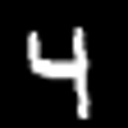

i am confident around 99.96% that this image corresponds to digit 4


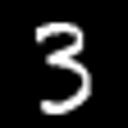

i am confident around 99.94% that this image corresponds to digit 3


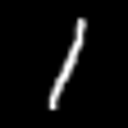

i am confident around 99.96% that this image corresponds to digit 1


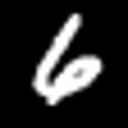

i am confident around 99.98% that this image corresponds to digit 6


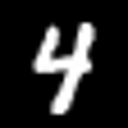

i am confident around 99.99% that this image corresponds to digit 4


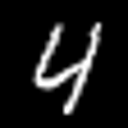

i am confident around 99.94% that this image corresponds to digit 4


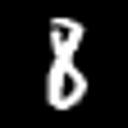

i am confident around 95.97% that this image corresponds to digit 8


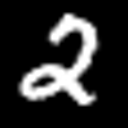

i am confident around 99.97% that this image corresponds to digit 2


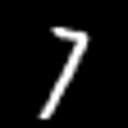

i am confident around 99.45% that this image corresponds to digit 7


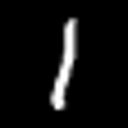

i am confident around 99.99% that this image corresponds to digit 1


In [9]:
import numpy as np
import random
from PIL import Image
from IPython.display import display

# display best model prediction on validation examples
for _ in range(10):

    # display example
    idx = random.choice(range(x_validation.shape[0]))
    image = x_validation[idx].reshape(28, 28)
    image = (image * 255).astype(dtype=np.uint8)
    display(Image.fromarray(image).resize((128,128)))

    # display model prediction
    datapoint = x_validation[idx].reshape(1, 784)
    predict_prob = model.predict(datapoint, verbose=0)
    print('i am confident around {:.2f}% that this image corresponds to digit {}'.format(np.amax(predict_prob)*100, np.argmax(predict_prob)))

In [10]:
x_validation = x_validation.reshape(10000, 784)
loss, acc = model.evaluate(x_validation, y_validation, batch_size=64, verbose=1)
print('test accuracy: ', round(100*acc, 2))

157/157 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9767
test accuracy:  97.67
